In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/churnnotclean.csv')

In [ ]:
df.head()

,Unnamed: 0,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn
0,0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,0
1,1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,1
2,2,0.77,5.0,4.3,1.00,Astapor,2014-07-01,iPhone,2014-06-01,0.0,3,False,100.0,0
3,3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-10-01,20.0,9,True,80.0,0
4,4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,1


In [ ]:
df.shape

(50000, 14)

#### There is an unknown column 'Unnamed: 0', we can take it as ID of each observation.

In [ ]:
df.rename(columns={'Unnamed: 0':'ID'},inplace=True)

In [ ]:
df.head()

,ID,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn
0,0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,0
1,1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,1
2,2,0.77,5.0,4.3,1.00,Astapor,2014-07-01,iPhone,2014-06-01,0.0,3,False,100.0,0
3,3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-10-01,20.0,9,True,80.0,0
4,4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,1


In [ ]:
df.shape

(50000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      50000 non-null  int64  
 1   avg_dist                50000 non-null  float64
 2   avg_rating_by_driver    49799 non-null  float64
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   city                    50000 non-null  object 
 6   last_trip_date          50000 non-null  object 
 7   phone                   49604 non-null  object 
 8   signup_date             50000 non-null  object 
 9   surge_pct               50000 non-null  float64
 10  trips_in_first_30_days  50000 non-null  int64  
 11  luxury_car_user         50000 non-null  bool   
 12  weekday_pct             50000 non-null  float64
 13  churn                   50000 non-null  int64  
dtypes: bool(1), float64(6), int64(3), obje

#### "ID" feature will not add any value to the dataset so will ignore it for now and calculate the 5 point summary!

In [ ]:
df.iloc[:,1:].describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,churn
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084,0.535380
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503,0.498752
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000,0.000000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000,1.000000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000,1.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000,1.000000


#### From the five-point summary of numerical predictors:

1. Count parameter of Five-Point summary let us know that there are few missing/null values present in dataset.
2. Variables namely "avg_dist", "surge_pct" and "trips_in_first_30_days" have huge deviation between mean and max value. This might be the indicator of huge-number of or large outlier(s) present. This will clearout in further processess.

#### About Data

In [ ]:
df.shape

(50000, 14)

In [ ]:
num_col=df.select_dtypes(np.number)
cat_col=df.select_dtypes('object')

print('The numerical columns: \n',list(df.select_dtypes(np.number).columns))
print('The categorical columns: \n',list(df.select_dtypes('object').columns))

The numerical columns: 
 ['ID', 'avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'trips_in_first_30_days', 'weekday_pct', 'churn']
The categorical columns: 
 ['city', 'last_trip_date', 'phone', 'signup_date']


In [ ]:
print('The no of categories in the categorical columns are:',cat_col.shape[1])
print('The no of categories in the numerical columns are:',num_col.shape[1])

The no of categories in the categorical columns are: 4
The no of categories in the numerical columns are: 9


['ID', 'avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'trips_in_first_30_days', 'weekday_pct', 'churn'] are the independent random variable which we have segregated on the basis of datatypes of this features.


After further analysis of these predictors, we relarized that ['avg_rating_by_driver', 'avg_rating_of_driver', 'churn'] are masked as numerical even though they are categorical in nature. ['avg_rating_by_driver', 'avg_rating_of_driver'] are the ordinal feature present in this dataset.

The independent feature ['trips_in_first_30_days'] is a numerical variable as stated above but with a peculiar discrete nature. Rest of the variables are continous in nature.

The categorical columns: ['city', 'last_trip_date', 'phone', 'signup_date']

Variable ['city'] is nominal data i.e., it's sub-categories should not consist of weight. ['last_trip_date', 'signup_date'] are the variables masked as "objec" i.e. categorical but in reality it have date-time datatype.

The above bifurcation of these datatype's of each Independent and Dependent variable will be treated accordingly in the further processes to get the best accuracry of models.

In [ ]:
for i in cat_col:
    print('******* The % of observations in each sub-category is : *******\n')
    print(f'{i}:')
    print(df[i].value_counts(normalize=True)*100,'\n')

******* The % of observations in each sub-category is : *******

city:
Winterfell        46.672
Astapor           33.068
King's Landing    20.260
Name: city, dtype: float64 

******* The % of observations in each sub-category is : *******

last_trip_date:
2014-06-29    4.072
2014-06-28    3.358
2014-06-30    2.816
2014-06-27    2.240
2014-06-22    2.048
              ...  
2014-02-26    0.158
2014-02-19    0.158
2014-02-20    0.148
2014-04-03    0.138
2014-10-03    0.138
Name: last_trip_date, Length: 182, dtype: float64 

******* The % of observations in each sub-category is : *******

phone:
iPhone     69.716152
Android    30.283848
Name: phone, dtype: float64 

******* The % of observations in each sub-category is : *******

signup_date:
2014-01-18    5.896
2014-01-25    5.770
2014-11-01    4.804
2014-01-24    4.568
2014-01-17    4.298
2014-01-31    4.200
2014-01-19    4.056
2014-10-01    4.042
2014-06-01    3.526
2014-01-01    3.474
2014-01-26    3.416
2014-01-23    3.212
2014-07-01

In [ ]:
for i in num_col:
    print('******* The % of observations in each sub-category is : *******\n')
    print(f'{i}:')
    print(df[i].value_counts(normalize=True)*100,'\n')

******* The % of observations in each sub-category is : *******

ID:
2047     0.002
36155    0.002
40281    0.002
38232    0.002
11599    0.002
         ...  
21151    0.002
23198    0.002
17053    0.002
19100    0.002
0        0.002
Name: ID, Length: 50000, dtype: float64 

******* The % of observations in each sub-category is : *******

avg_dist:
0.00     0.300
2.30     0.232
2.29     0.232
2.70     0.228
2.36     0.228
         ...  
55.60    0.002
21.19    0.002
22.45    0.002
26.94    0.002
46.02    0.002
Name: avg_dist, Length: 2908, dtype: float64 

******* The % of observations in each sub-category is : *******

avg_rating_by_driver:
5.0    57.246129
4.8     9.110625
4.7     6.686881
4.9     6.212976
4.5     4.867568
4.6     4.172775
4.0     3.843451
4.3     2.044218
4.4     1.726942
3.0     1.208860
4.2     0.686761
3.5     0.399606
3.7     0.391574
1.0     0.363461
2.0     0.253017
4.1     0.251009
3.8     0.222896
3.3     0.094379
3.9     0.082331
2.5     0.062250
3.6     0.

#### Let us see the the description of Categorical columns!

In [ ]:
df.describe(include='object').T

,count,unique,top,freq
city,50000,3,Winterfell,23336
last_trip_date,50000,182,2014-06-29,2036
phone,49604,2,iPhone,34582
signup_date,50000,31,2014-01-18,2948


From the description of Categorical Columns:
We have null/missing values in "phone" varibale.
There are 31 unique values in "signup_date" we need to see the anomilies present in it and thus helps us to define the time-span of this dataset.

#### From the description of Categorical Columns:
1. We have null/missing values in "phone" varibale.
2. There are 31 unique values in "signup_date" we need to see the anomilies present in it and thus helps us to define the time-span of this dataset.

In [ ]:
df.churn.value_counts(normalize=True)*100

1    53.538
0    46.462
Name: churn, dtype: float64

#### From the above value count of values present in "churn" variable we can say that, dataset is well balanced.

### Now, without further a do we will dive into data preprocessing methods.

## Converting "last_trip_date" and "last_trip_date" into date format:

In [ ]:
df['last_trip_date']=pd.to_datetime(df['last_trip_date'],format='%Y-%m-%d')
df['signup_date']=pd.to_datetime(df['signup_date'],format='%Y-%m-%d')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      50000 non-null  int64         
 1   avg_dist                50000 non-null  float64       
 2   avg_rating_by_driver    49799 non-null  float64       
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   city                    50000 non-null  object        
 6   last_trip_date          50000 non-null  datetime64[ns]
 7   phone                   49604 non-null  object        
 8   signup_date             50000 non-null  datetime64[ns]
 9   surge_pct               50000 non-null  float64       
 10  trips_in_first_30_days  50000 non-null  int64         
 11  luxury_car_user         50000 non-null  bool          
 12  weekday_pct             50000 non-null  float6

## Checking for null/missing Values

In [ ]:
df.isnull().sum()/df.shape[0] * 100

ID                         0.000
avg_dist                   0.000
avg_rating_by_driver       0.402
avg_rating_of_driver      16.244
avg_surge                  0.000
city                       0.000
last_trip_date             0.000
phone                      0.792
signup_date                0.000
surge_pct                  0.000
trips_in_first_30_days     0.000
luxury_car_user            0.000
weekday_pct                0.000
churn                      0.000
dtype: float64

Null/missing value inferences:
1. In this data-set there is not much null values. Amongst all the possible predictors,"avg_rating_of_driver" contains maximum null value i.e. around 16%. Variables "avg_rating_by_driver" and "phone" are 0.402% and 0.792% which are quite negligible.
2. After giving quite a thought to these variables, we decided not to treat this null/missing values for now. As there null can be delclared as IGNORANCE / NEGLIGENCE we might be able infer out few business solutions or restrictions.

#### Row wise null Values

In [ ]:
pd.set_option('display.max_rows',50000)

df.isnull().sum(axis=1).max() #row-wise max nulls

3

#### Above code snippit confirms us there are no more null values in dataset. 

Even though from the above processes and codes we are not sure if there are zero anomalies present in data. 
So, we will be checking each feature with there unique values.

In [ ]:
n=0
for i in df.columns:
    print('Variable is:',i,'\n')
    print('Unique values for feature "',i,'" is:\n')
    print(df[i].unique(),'\n')

Variable is: ID 

Unique values for feature " ID " is:

[    0     1     2 ... 49997 49998 49999] 

Variable is: avg_dist 

Unique values for feature " avg_dist " is:

[ 3.67  8.26  0.77 ... 38.72 27.47 30.39] 

Variable is: avg_rating_by_driver 

Unique values for feature " avg_rating_by_driver " is:

[5.  4.9 4.  3.  4.8 4.7 4.5 4.2 nan 4.4 4.6 3.7 4.3 3.5 2.  3.8 2.5 4.1
 3.9 1.  3.3 3.4 3.6 3.2 2.3 2.8 1.5 2.7] 

Variable is: avg_rating_of_driver 

Unique values for feature " avg_rating_of_driver " is:

[4.7 5.  4.3 4.6 4.4 3.5 nan 4.5 4.  3.9 4.9 4.8 2.5 3.7 1.  4.1 4.2 3.
 3.8 2.  2.7 3.3 2.8 3.6 3.4 3.2 2.6 3.1 2.9 1.7 1.8 1.5 2.3 1.9 2.1 2.4
 1.6 2.2] 

Variable is: avg_surge 

Unique values for feature " avg_surge " is:

[1.1  1.   1.14 1.19 1.38 1.21 1.17 1.02 1.05 1.5  2.   1.25 1.04 1.88
 1.33 1.56 1.06 1.03 1.09 1.35 3.5  1.11 1.63 2.5  1.32 1.3  1.75 2.25
 1.2  1.13 1.08 1.15 4.   1.12 1.22 1.29 1.23 1.01 1.07 1.18 1.45 2.75
 2.63 1.46 2.07 1.27 3.   1.36 1.96 1.42 1.44 1

### There are no Anomilies present is the dataset except null values. We can clearly see it from the the above output.

### Now we will be checking the distribution of data.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


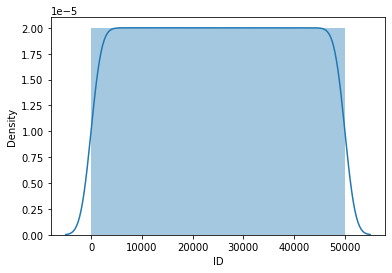

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


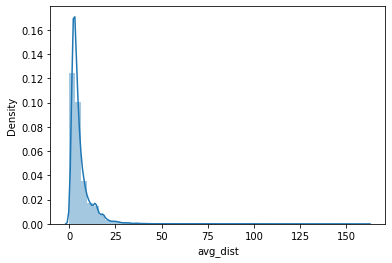

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


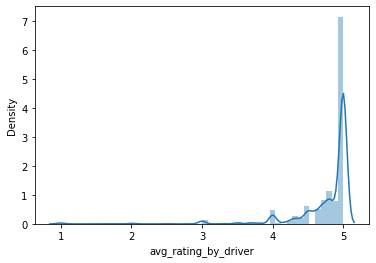

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


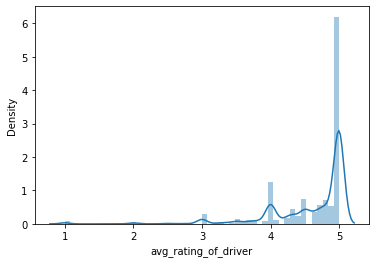

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


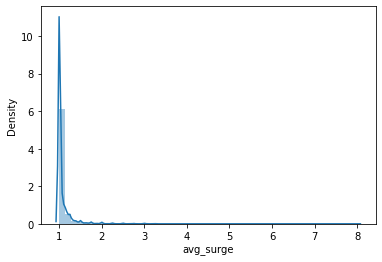

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


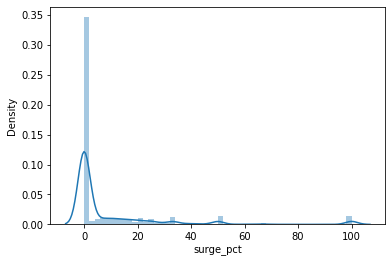

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


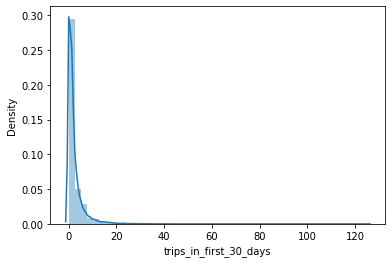

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


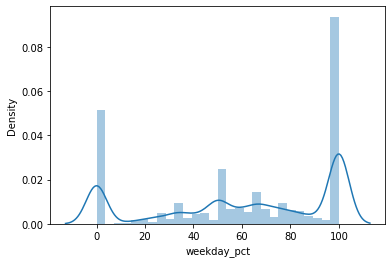

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


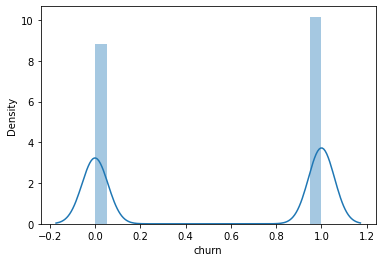

In [ ]:
for i in df.select_dtypes(np.number):
    sns.distplot(df[i].dropna())
    plt.show()

In [ ]:
df.skew()

ID                        0.000000
avg_dist                  3.464170
avg_rating_by_driver     -4.128909
avg_rating_of_driver     -2.428485
avg_surge                 6.821346
surge_pct                 3.144124
trips_in_first_30_days    5.167755
luxury_car_user           0.507262
weekday_pct              -0.477788
churn                    -0.141880
dtype: float64

We cannot define the distributions of these features. We can only say that these are heavily skewed. "weekday_pct" is the only variable which is widely distributed. We will  be using various transformation techiniques to treat this varied variables. 
"avg_dist", "avg_surge", "surge_pct" and "trips_in_first_30_days" are the freatures which might belong to LOG NORMAL DISTRIBUTION. We will define the distribution on each feature and it's treatment to transform it into STANDARD NORMAL DISTRIBUTION in scaling and trasformation process.

In [ ]:
df.drop('ID', axis=1, inplace=True)

#### We are dropping the feature "ID" as it will not place any significance while predicting the dependent variable.

In [ ]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,1
2,0.77,5.0,4.3,1.00,Astapor,2014-07-01,iPhone,2014-06-01,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-10-01,20.0,9,True,80.0,0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,1


### Outliers plays a major role in any kind of anaysis/prediction. Keeping an eye on outliers is one of the most important aspect while handeling a dataset. To have better accracy in model and prediction we need to treat these outliers. Let's summirize the outliers present in our dataset.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


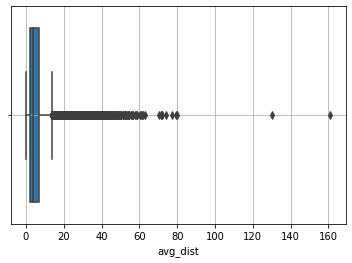

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


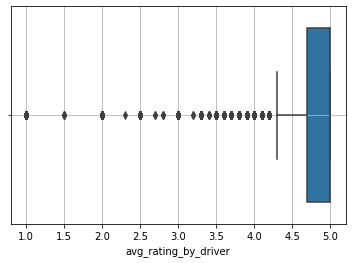

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


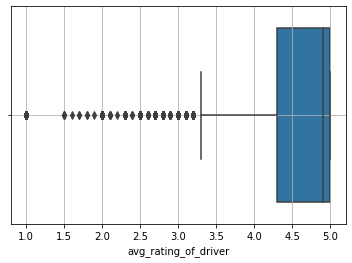

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


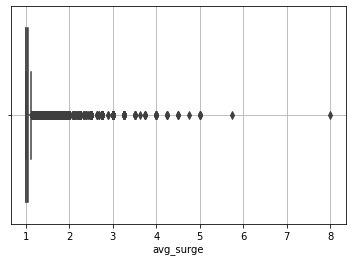

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


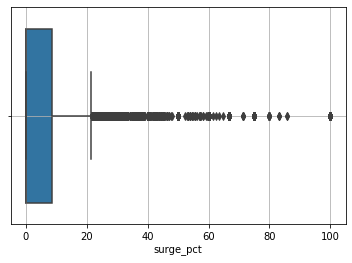

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


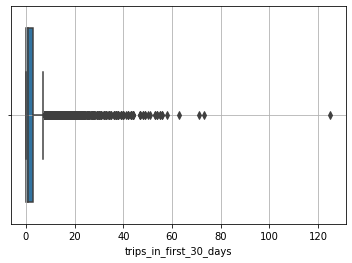

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


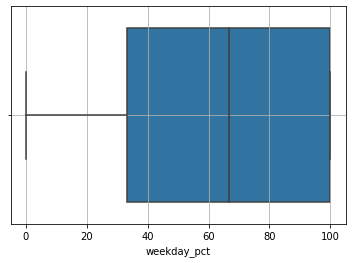

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


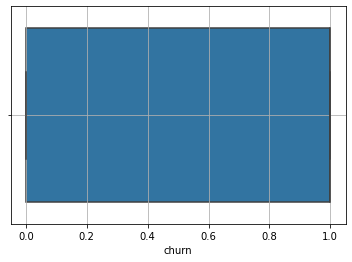

In [ ]:
for i in df.select_dtypes('number'):
    sns.boxplot(df[i])
    plt.grid()
    plt.show()

### One of the best plot for identification of ouliers is Boxplot. Boxplot of numerical independent variables, it shows us that these variables have huge amount of outliers. It will bais out prediction and analysis. In further processes we will treat them appropriately.

## Exploratory Data Analysis:

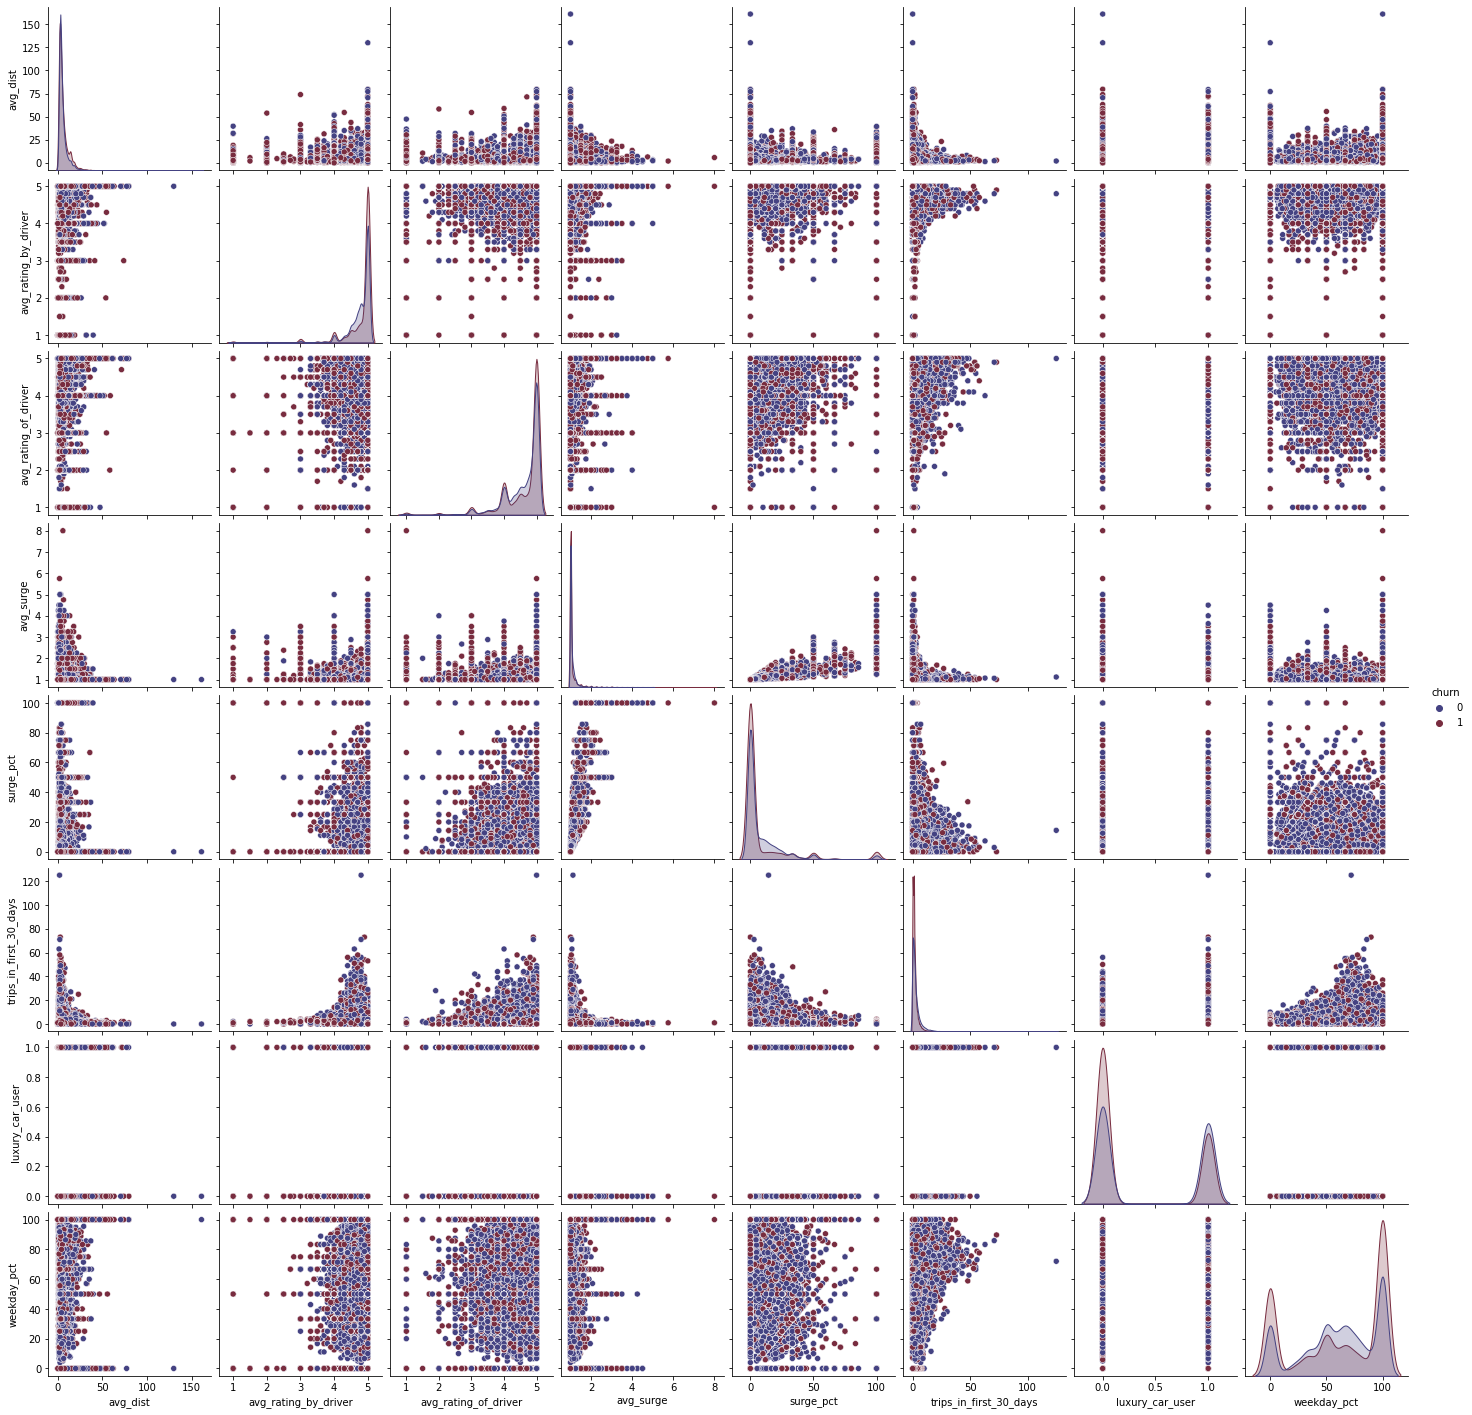

In [ ]:
sns.pairplot(df, kind='scatter', hue='churn', palette='icefire')
plt.show()

In [ ]:
df.corr()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn
avg_dist,1.000000,0.080540,0.034509,-0.081491,-0.104414,-0.136329,0.032310,0.101652,0.062604
avg_rating_by_driver,0.080540,1.000000,0.123175,0.010597,0.020103,-0.039115,0.009343,0.020442,0.018628
avg_rating_of_driver,0.034509,0.123175,1.000000,-0.026189,-0.003899,-0.011302,-0.002086,0.014630,0.011307
avg_surge,-0.081491,0.010597,-0.026189,1.000000,0.793582,-0.001841,-0.078791,-0.110071,-0.005148
surge_pct,-0.104414,0.020103,-0.003899,0.793582,1.000000,0.005720,-0.106861,-0.144918,-0.002780
trips_in_first_30_days,-0.136329,-0.039115,-0.011302,-0.001841,0.005720,1.000000,0.112210,0.050388,-0.146388
luxury_car_user,0.032310,0.009343,-0.002086,-0.078791,-0.106861,0.112210,1.000000,0.035998,-0.145793
weekday_pct,0.101652,0.020442,0.014630,-0.110071,-0.144918,0.050388,0.035998,1.000000,-0.001473
churn,0.062604,0.018628,0.011307,-0.005148,-0.002780,-0.146388,-0.145793,-0.001473,1.000000


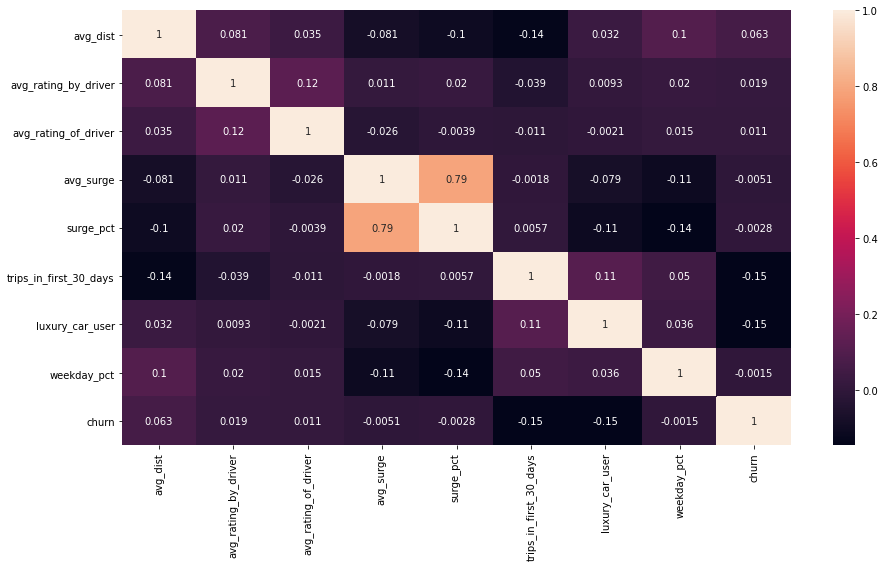

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

### From heatmap and correlation matrix we get to kmow that "Surge_pct" and "avg_surge" are highly positively correlated (0.79).This positively high correlation states that this variables are similar to each other. This correlation will lead to multicolinearity and the assumption of NO MULTICOLINEARIY will fail. Failure in removing/reducing in multicolinearity will hamper the judgemnet/prediction of our Machine Learning model. Which will ultimately leads to low accuracy of our models. We can treat this multicolinearity using PCA.

In [ ]:
num_col.columns

Index(['ID', 'avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver',
       'avg_surge', 'surge_pct', 'trips_in_first_30_days', 'weekday_pct',
       'churn'],
      dtype='object')

### Relation between these variable is been defined by heatmap and correlation matrix.
### To visualize this relation of variables, bivariate analysis will be done. 
### In Bivariate analysis, scatter plot is one the best plot/graph to visualize the relation between the variables.

## "avg_dist"

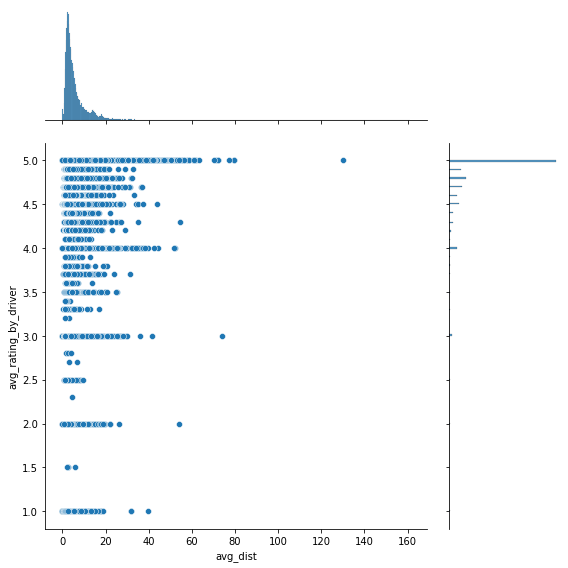

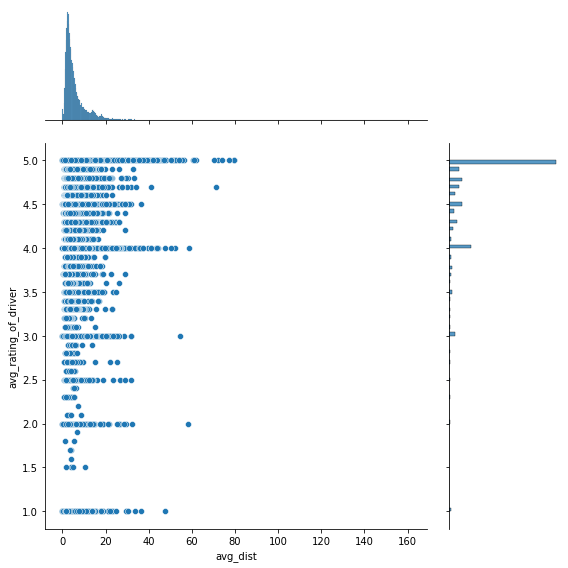

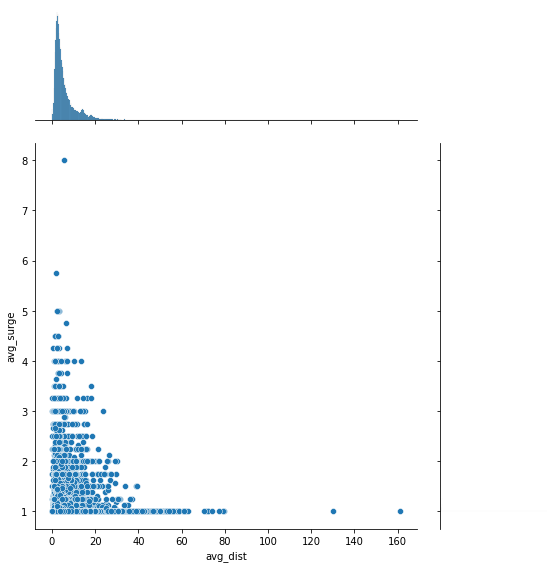

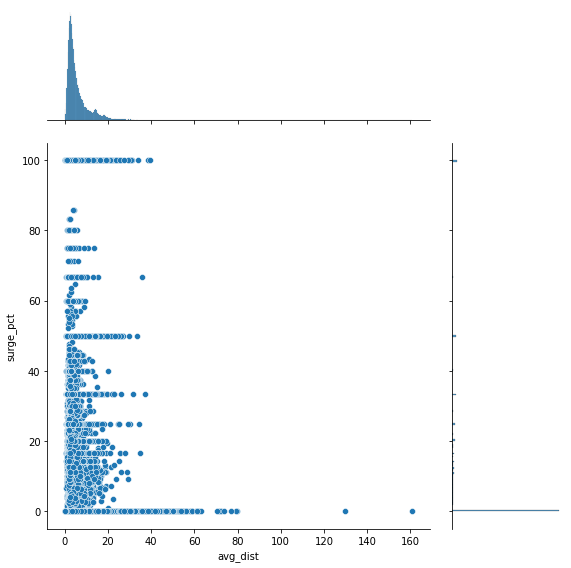

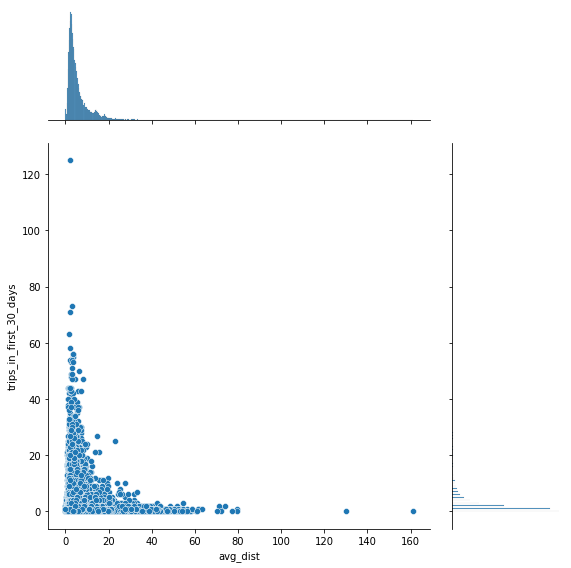

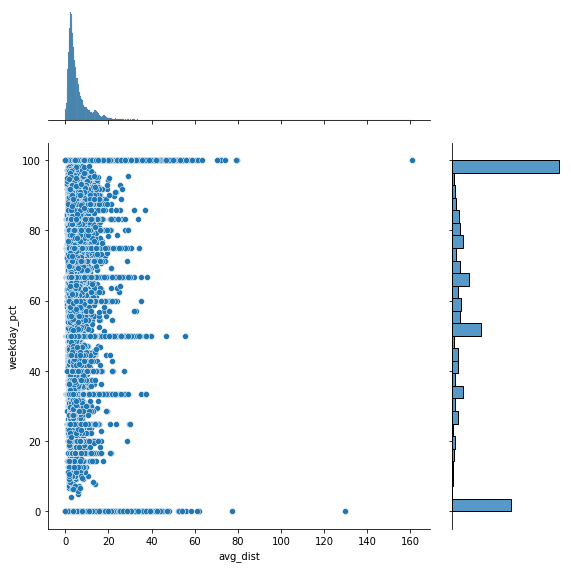

In [ ]:
sns.jointplot(data=df, x = 'avg_dist', y='avg_rating_by_driver', height=8, ratio=3, )
plt.show()
sns.jointplot(data=df, x = 'avg_dist', y='avg_rating_of_driver', height=8, ratio=3)
plt.show()
sns.jointplot(data=df, x = 'avg_dist', y='avg_surge', height=8, ratio=3)
plt.show()
sns.jointplot(data=df, x = 'avg_dist', y='surge_pct', height=8, ratio=3)
plt.show()
sns.jointplot(data=df, x = 'avg_dist', y='trips_in_first_30_days', height=8, ratio=3)
plt.show()
sns.jointplot(data=df, x = 'avg_dist', y='weekday_pct', height=8, ratio=3)
plt.show()

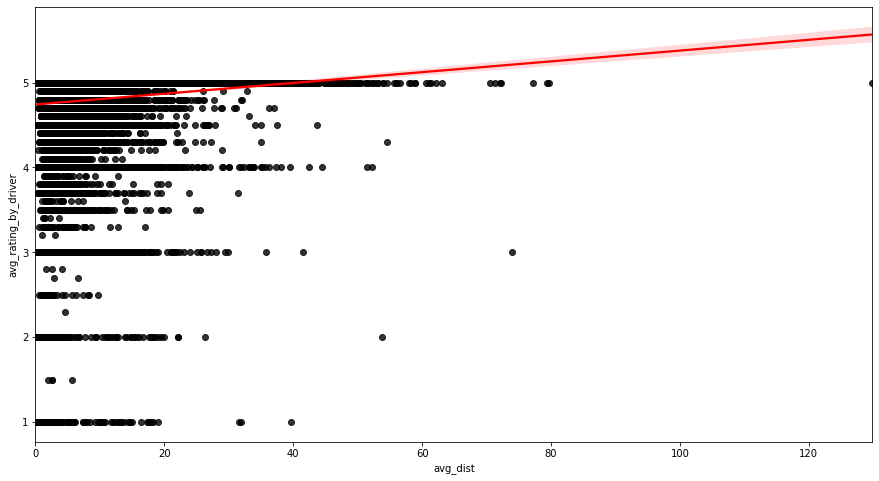

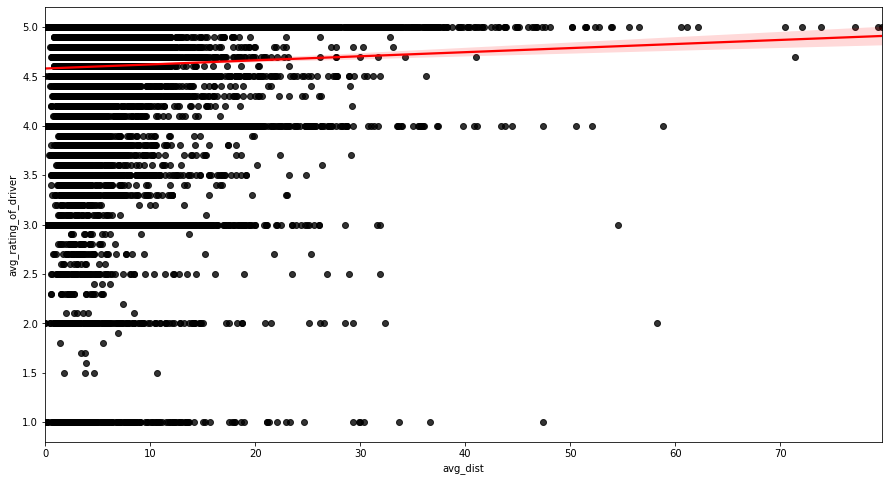

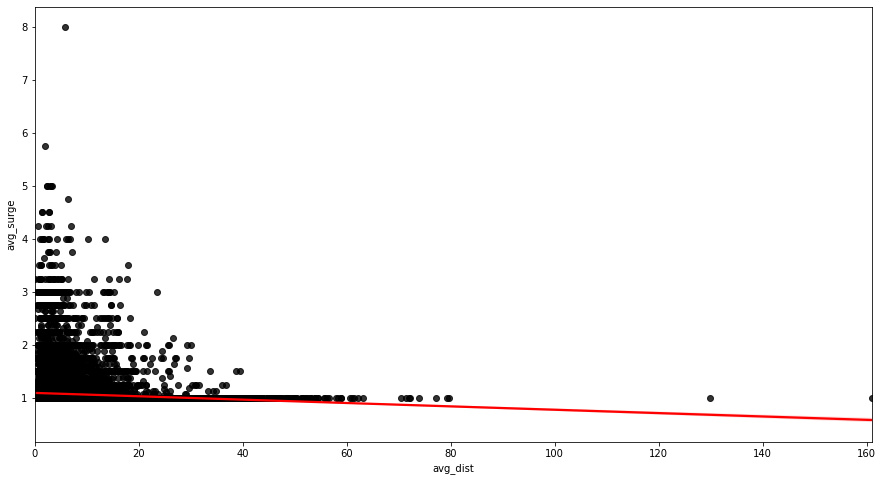

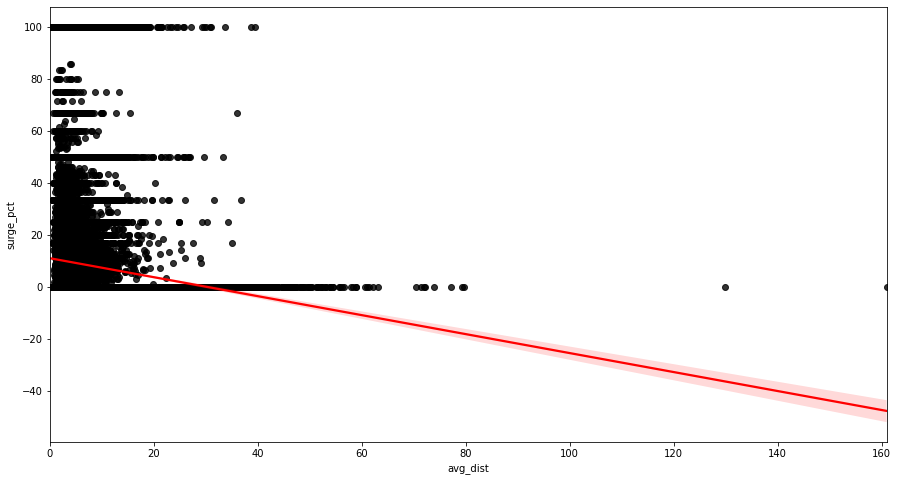

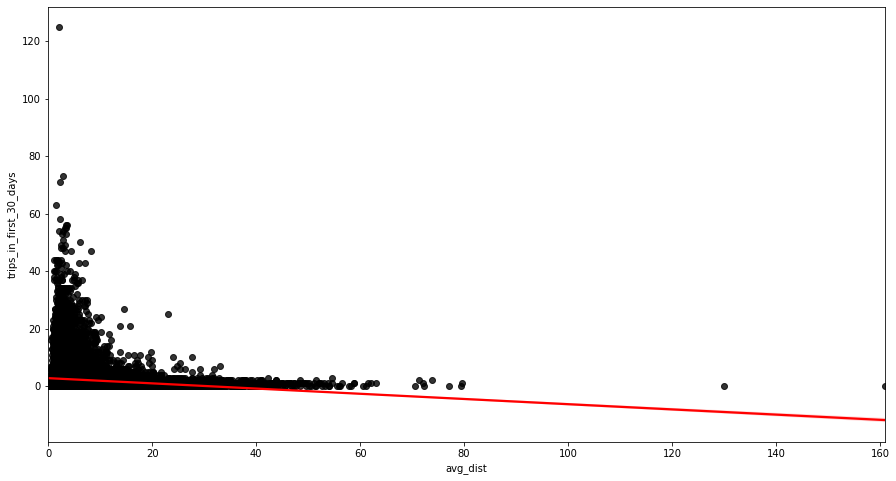

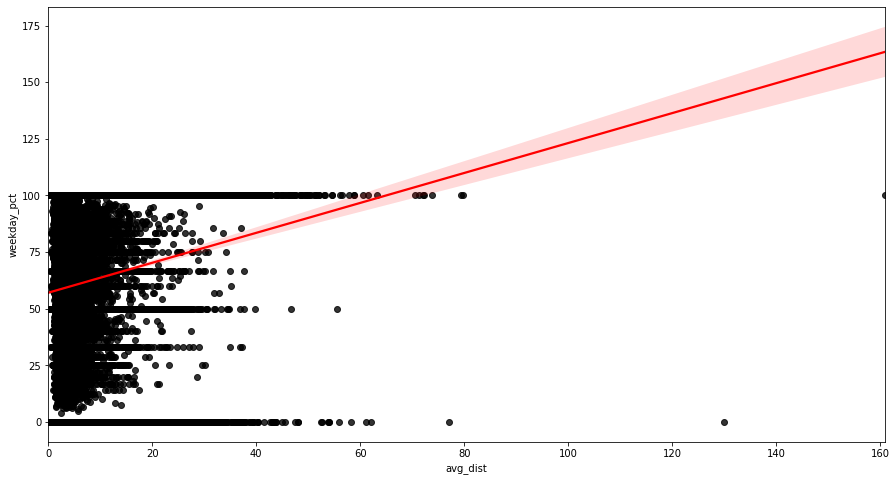

In [ ]:
plt.figure(figsize=(15,8))
sns.regplot(data=df, x = 'avg_dist', y='avg_rating_by_driver', scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.show()
plt.figure(figsize=(15,8))
sns.regplot(data=df, x = 'avg_dist', y='avg_rating_of_driver', scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.show()
plt.figure(figsize=(15,8))
sns.regplot(data=df, x = 'avg_dist', y='avg_surge', scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.show()
plt.figure(figsize=(15,8))
sns.regplot(data=df, x = 'avg_dist', y='surge_pct', scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.show()
plt.figure(figsize=(15,8))
sns.regplot(data=df, x = 'avg_dist', y='trips_in_first_30_days', scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.show()
plt.figure(figsize=(15,8))
sns.regplot(data=df, x = 'avg_dist', y='weekday_pct', scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.show()

In [ ]:
num_col.columns

Index(['ID', 'avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver',
       'avg_surge', 'surge_pct', 'trips_in_first_30_days', 'weekday_pct',
       'churn'],
      dtype='object')

## "avg_rating_by_driver2"

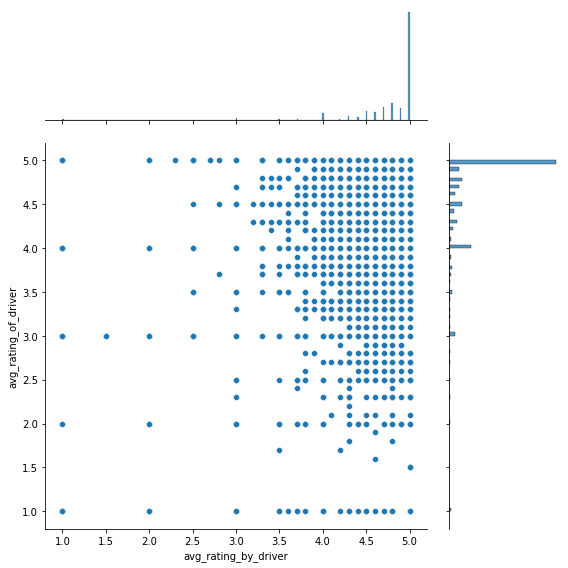

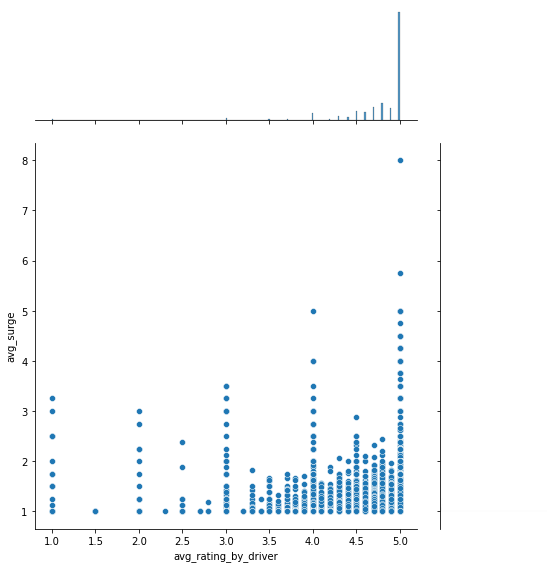

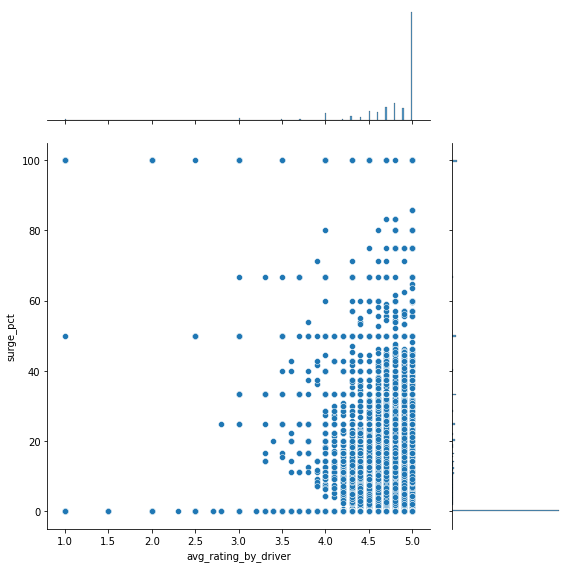

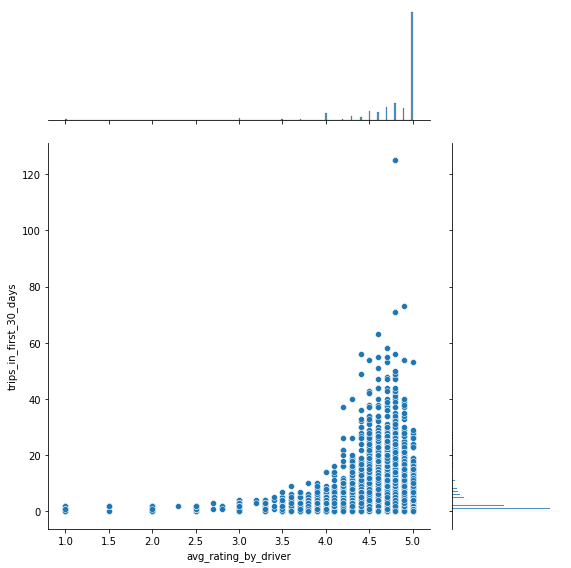

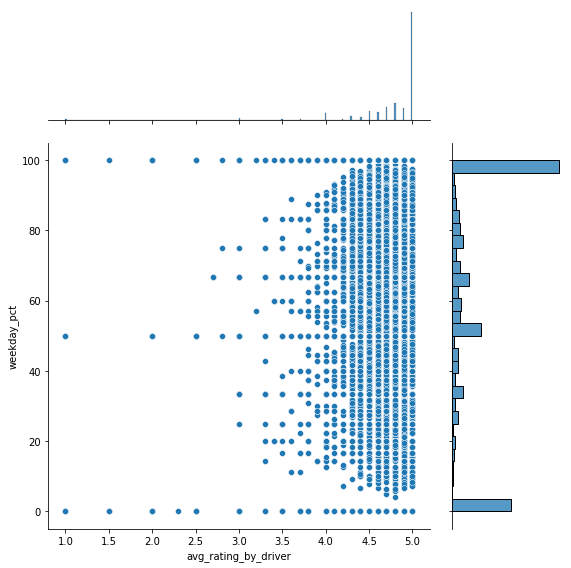

In [ ]:
sns.jointplot(data=df, x = 'avg_rating_by_driver', y='avg_rating_of_driver', height=8, ratio=3)
plt.show()
sns.jointplot(data=df, x = 'avg_rating_by_driver', y='avg_surge', height=8, ratio=3)
plt.show()
sns.jointplot(data=df, x = 'avg_rating_by_driver', y='surge_pct', height=8, ratio=3)
plt.show()
sns.jointplot(data=df, x = 'avg_rating_by_driver', y='trips_in_first_30_days', height=8, ratio=3)
plt.show()
sns.jointplot(data=df, x = 'avg_rating_by_driver', y='weekday_pct', height=8, ratio=3)
plt.show()

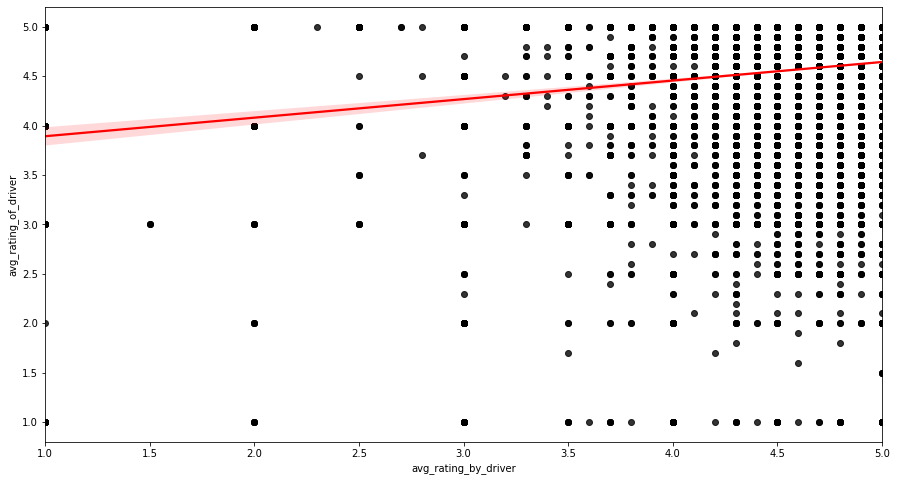

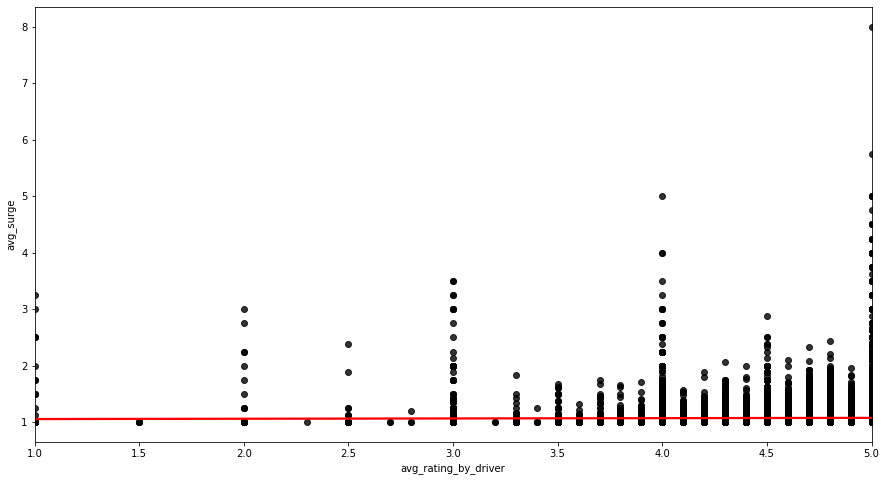

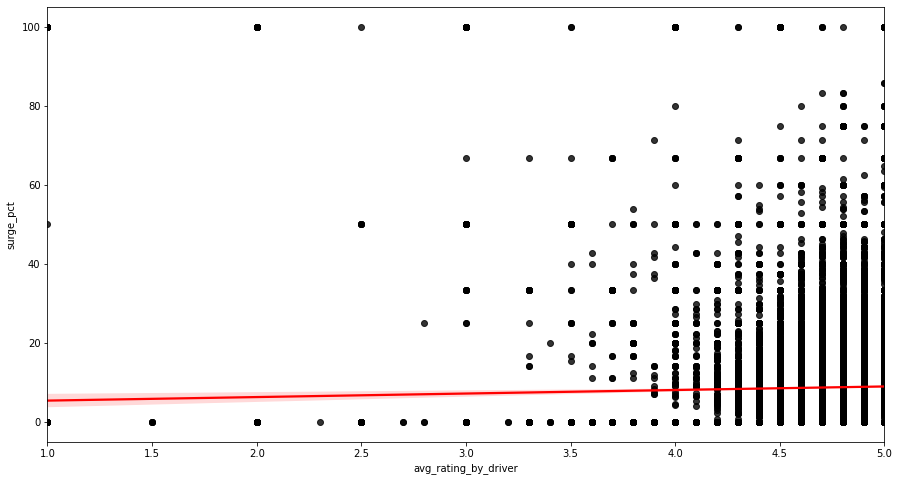

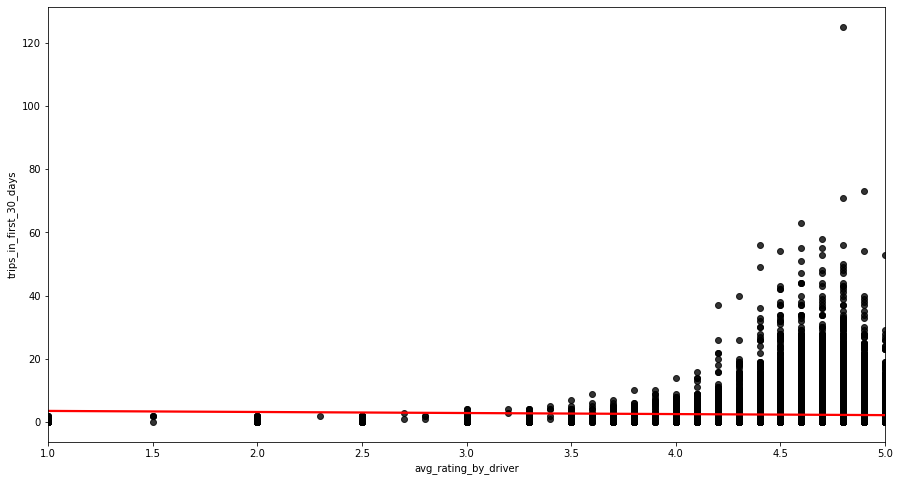

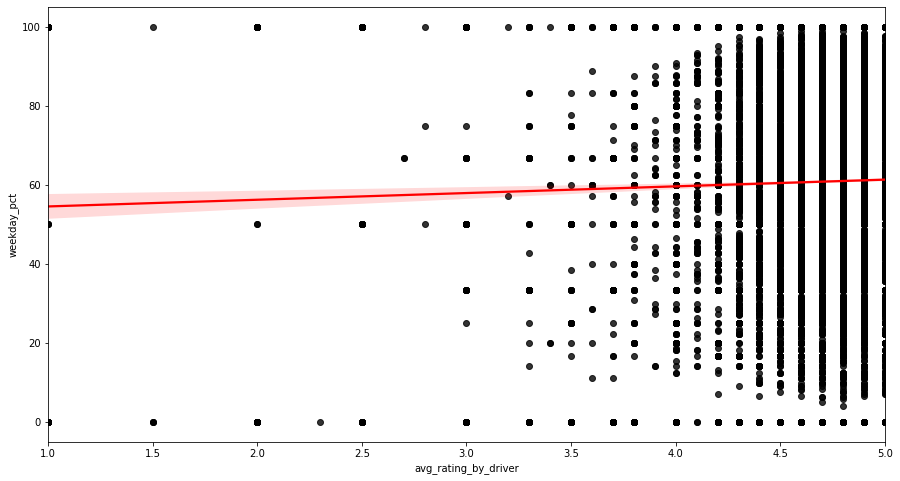

In [ ]:
plt.figure(figsize=(15,8))
sns.regplot(data=df, x = 'avg_rating_by_driver', y='avg_rating_of_driver', scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.show()
plt.figure(figsize=(15,8))
sns.regplot(data=df, x = 'avg_rating_by_driver', y='avg_surge', scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.show()
plt.figure(figsize=(15,8))
sns.regplot(data=df, x = 'avg_rating_by_driver', y='surge_pct', scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.show()
plt.figure(figsize=(15,8))
sns.regplot(data=df, x = 'avg_rating_by_driver', y='trips_in_first_30_days', scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.show()
plt.figure(figsize=(15,8))
sns.regplot(data=df, x = 'avg_rating_by_driver', y='weekday_pct', scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.show()

## "avg_surge"

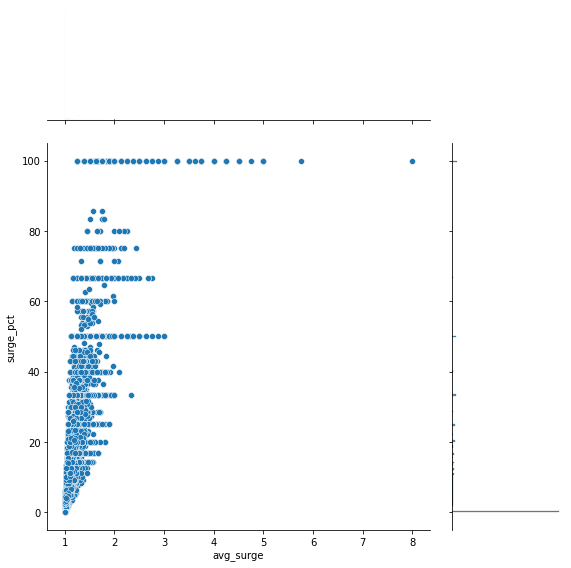

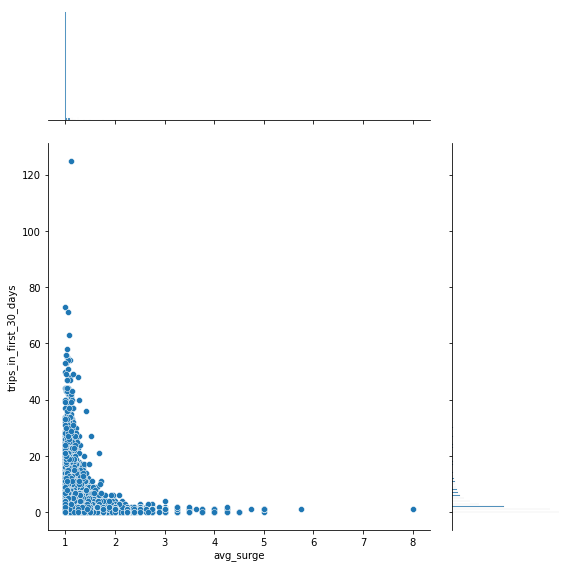

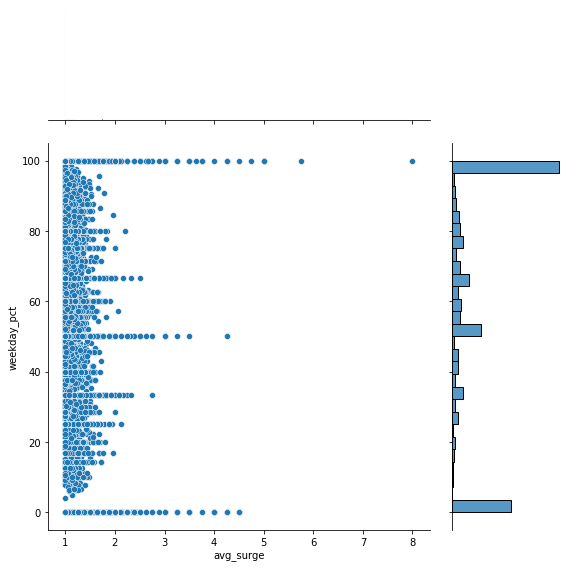

In [ ]:

sns.jointplot(data=df, x = 'avg_surge', y='surge_pct', height=8, ratio=3)
plt.show()
sns.jointplot(data=df, x = 'avg_surge', y='trips_in_first_30_days', height=8, ratio=3)
plt.show()
sns.jointplot(data=df, x = 'avg_surge', y='weekday_pct', height=8, ratio=3)
plt.show()

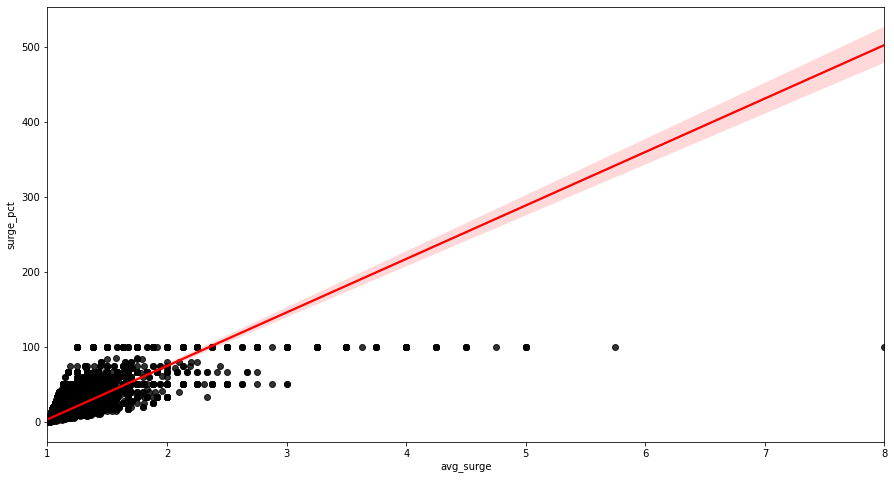

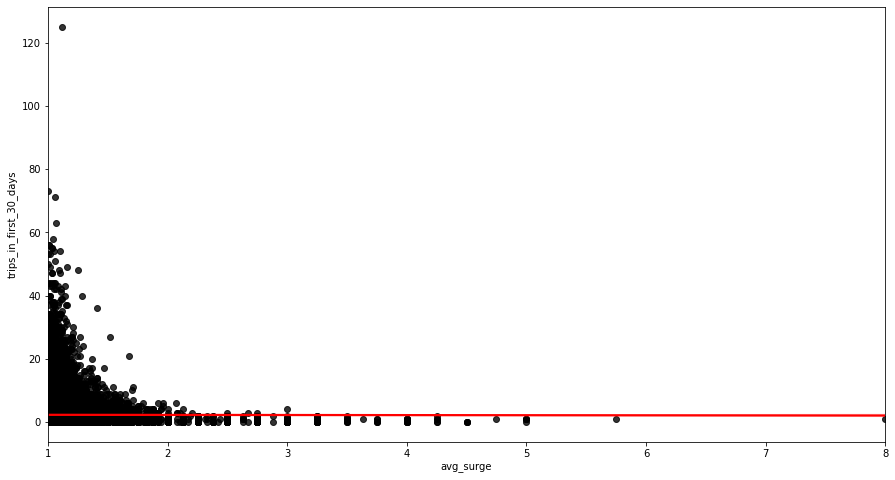

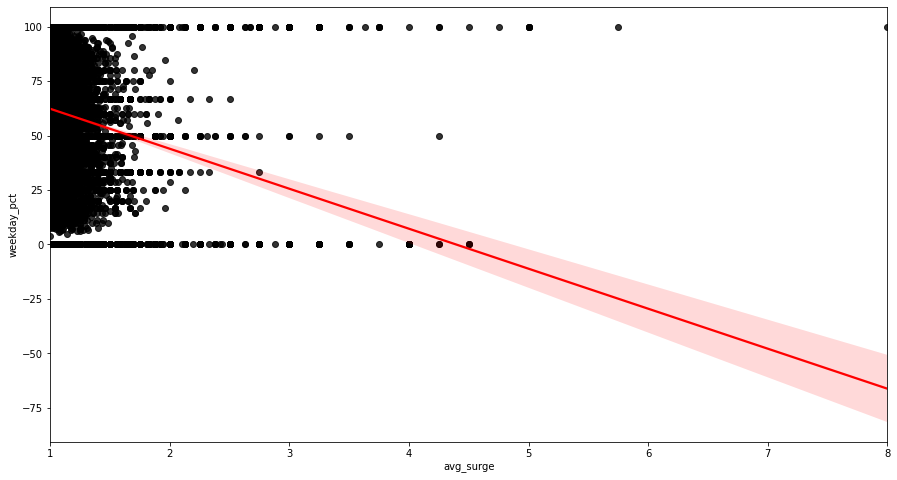

In [ ]:
plt.figure(figsize=(15,8))
sns.regplot(data=df, x = 'avg_surge', y='surge_pct', scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.show()
plt.figure(figsize=(15,8))
sns.regplot(data=df, x = 'avg_surge', y='trips_in_first_30_days', scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.show()
plt.figure(figsize=(15,8))
sns.regplot(data=df, x = 'avg_surge', y='weekday_pct', scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.show()

## "trips_in_first_30_days"

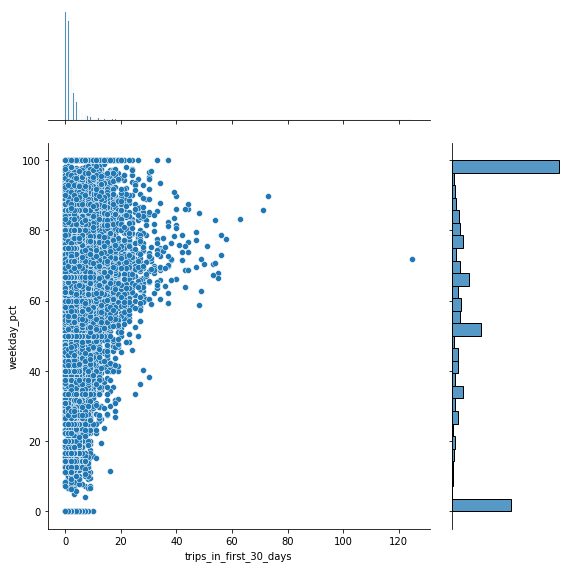

In [ ]:
sns.jointplot(data=df, x = 'trips_in_first_30_days', y='weekday_pct', height=8, ratio=3)
plt.show()

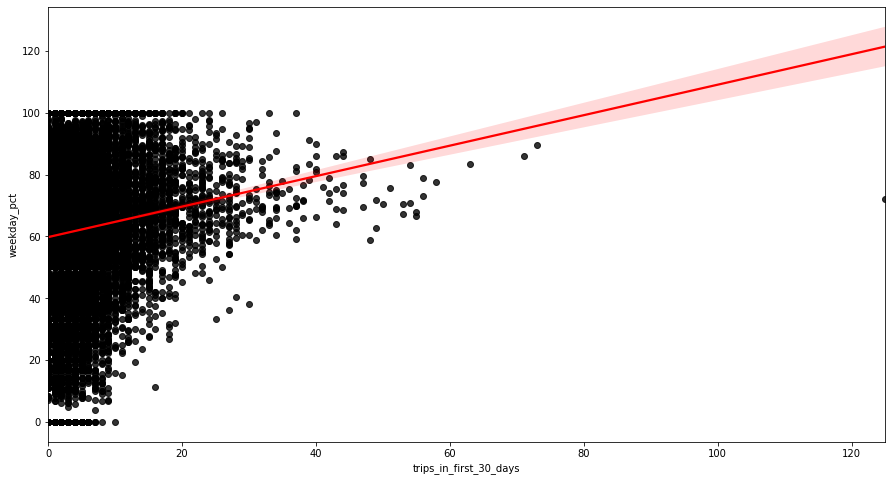

In [ ]:
plt.figure(figsize=(15,8))
sns.regplot(data=df, x = 'trips_in_first_30_days', y='weekday_pct', scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.show()

### As we know scatter plot is the best plot/graph to visualize the relationship between the variables. We decided to go ahead with jointplot and regplot which is a modified version of scatterplot, this plots are more inferential then scatterplot. From joint plot which is combination of scatterplot and histogram, it is distribution of each feature and relation between them can be readliy interpretable.
### Reg plot gives us the a straight line or the best fit line of the variables on scatter plot which gives a fairly good idea of the slope of there relation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


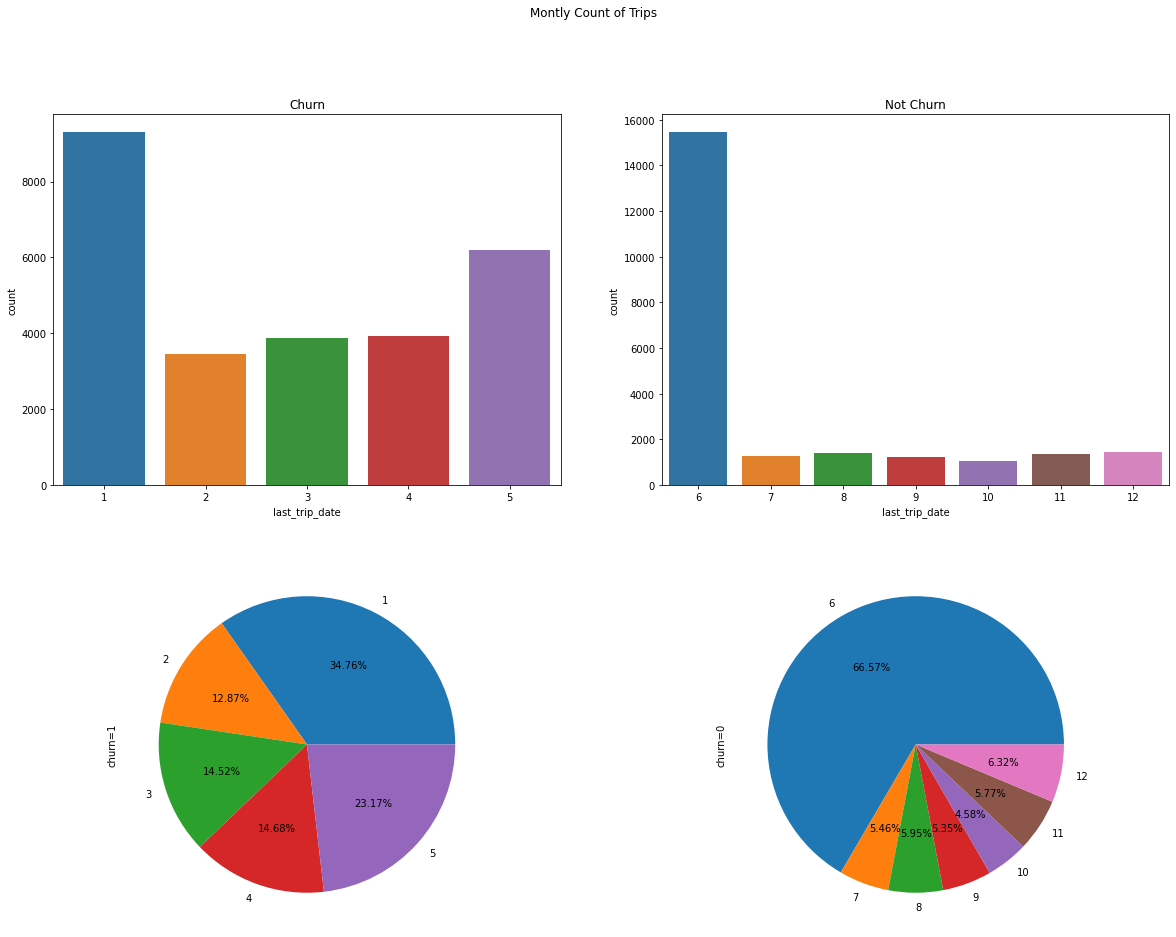

In [ ]:
df0=df[df['churn']==0]
df1=df[df['churn']==1]
plt.figure(figsize=(20,15))

plt.subplot(2, 2, 1)
sns.countplot(df1['last_trip_date'].dt.month)
plt.title("Churn")

plt.subplot(2, 2, 2)
sns.countplot(df0['last_trip_date'].dt.month)
plt.title("Not Churn")


plt.subplot(2, 2, 3)
df1['last_trip_date'].dt.month.value_counts().sort_index().plot(kind='pie',label='churn=1', autopct='%.2f%%')


plt.subplot(2, 2, 4)
df0['last_trip_date'].dt.month.value_counts().sort_index().plot(kind='pie',label='churn=0', autopct='%.2f%%')


plt.suptitle("Montly Count of Trips")
plt.show()

The above graphs shows the sublimation on the basis of customers who are churned and not churned count. It shows count of last trip monthwise.
1. We got a very unique inference from this distribution. Customer who are churned and not churned is been splited in two halfs of a year. In the year 2014 customers have churned in first half of the year i.e., in first five months.
2. We can see there is a peek on the 6th month and on the same month we can see the customers have stoped leaving this cab service.
3. It gave an sight that the campaign/promotion which is done was very sucessfull and after that we got a stable flow of trip each month.
4. We recommend that they should upgrade this promotion/campaign to increase the frequency of last trip.
5. They can even go for same campign each year as it is touching a peak of around 16000 count in a single month which is an exponential increse.

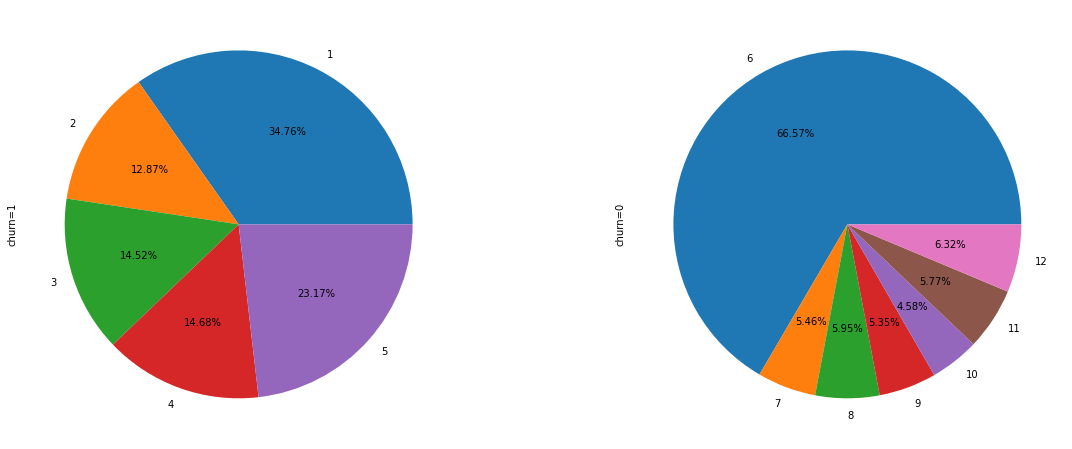

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1, 2, 1)
df1['last_trip_date'].dt.month.value_counts().sort_index().plot(kind='pie',label='churn=1', autopct='%.2f%%')

plt.subplot(1, 2, 2)
df0['last_trip_date'].dt.month.value_counts().sort_index().plot(kind='pie',label='churn=0', autopct='%.2f%%')
plt.show()

###Pie plot is noted to give the best inference in the percent for of our data. From the above pie plot which is in regard with the Monthly count of trips, we can easily justify the Monthly count of trips graph. 
1. This pie plot tells us that customers who are un-subscribing the cab service 2. is taking place only in the firt 5 month of 2014. And January have the highest churn percentage 32.12% followed by May 24.71%. 
3. We even get a hike in a active customers in the month of June i.e. 63.26% which can be stated as a new all time peak of active customers in the year of 2014. 
4.It shows that this company faced a very successful campaign/promotion.
On the later months from July  to December we can see a stable active users every month, which shows the stability due to the campaign.

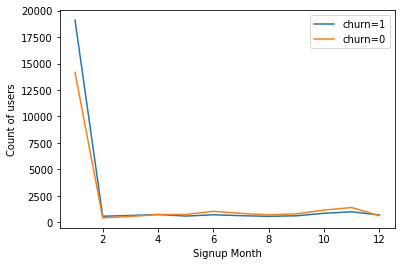

In [ ]:
df1['signup_date'].dt.month.value_counts().sort_index().plot(kind='line',label='churn=1')
df0['signup_date'].dt.month.value_counts().sort_index().plot(kind='line',label='churn=0')
plt.xlabel('Signup Month')
plt.ylabel('Count of users')
plt.legend()
plt.show()

#Signing up for ride sharing services has been drastically decreased after inital months. Also, there is a small spike for 11th month for users who are still using services.

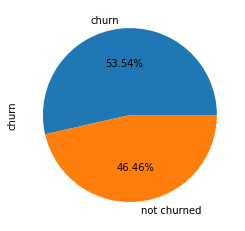

In [ ]:
df['churn'].value_counts().plot(kind='pie',autopct='%.2f%%',labels=['churn','not churned'])
plt.xticks(rotation=0)
plt.show()

53.54% of the customers have already been churned. This is not an ideal situation for any type of organization. Due to this the company will face a increased depth if not acted in time. Thus this analysis will prove critical.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


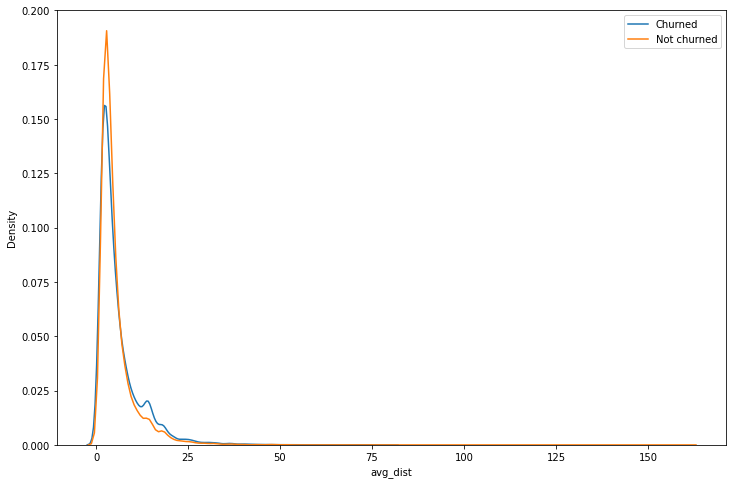

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(df1['avg_dist'],bins=5,hist=False,label='Churned')
sns.distplot(df0['avg_dist'],bins=5,hist=False,label='Not churned')
plt.legend()
plt.show()

Distance travelled on the basis of churn:
1. Irrespective of churn rate, customers are travelling in the range of 0-25 in first 30 after acquiring the cab services of this company.
2. Only few traveled more than that. Also, few customers who traveled more distance (ranging from 125 to 150 miles) on an average have churned.
3. This is a classic example of right skewed data as the right side of tail dosen't tend to be zero.


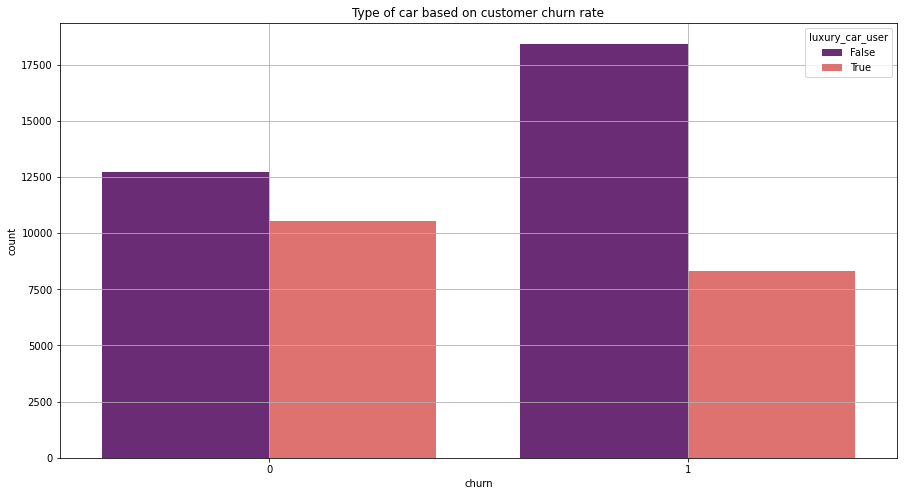

In [ ]:
plt.figure(figsize=(15,8))

sns.countplot(data=df, hue='luxury_car_user',x= 'churn', palette='magma') 
plt.title('Type of car based on customer churn rate') 
plt.grid()
plt.show()

This gives us an insight that less customers are preferring luxurious cars than the luxurious ones whether they are leaving the services or not.

In [ ]:
df.head(20)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,1
2,0.77,5.0,4.3,1.00,Astapor,2014-07-01,iPhone,2014-06-01,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-10-01,20.0,9,True,80.0,0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,1
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-09-01,0.0,2,True,100.0,0
6,3.95,4.0,NaN,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0,1
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0,1
8,4.36,5.0,4.5,1.00,Winterfell,2014-01-02,Android,2014-01-21,0.0,2,False,100.0,1
9,2.37,5.0,NaN,1.00,Winterfell,2014-05-01,Android,2014-03-01,0.0,1,False,0.0,1


#### For the sake of EDA we are replacing null values in feature "avg_rating_by_driver" & "avg_rating_of_driver" with "No Rating".From this we can we can get a clear insight of customers and drivers who are avoiding feedback system which is essential in to face any situation irrespective of situation.

In [ ]:
df_dum = df.copy()

In [ ]:
df_dum['avg_rating_by_driver'].fillna('No rating', inplace=True)
df_dum['avg_rating_of_driver'].fillna('No rating', inplace=True)

bins = pd.IntervalIndex.from_tuples([(0, 1), (2, 3), (4, 5)]) 
pd.cut(df_dum['avg_rating_by_driver'],bins).value_counts()
pd.cut(df_dum['avg_rating_by_driver'],bins).unique()
#not giving better results with bin .

[(4.0, 5.0], NaN, (2.0, 3.0], (0.0, 1.0]]
Categories (3, interval[int64]): [(0, 1] < (2, 3] < (4, 5]]

In [ ]:
df_dum.isnull().sum()

avg_dist                    0
avg_rating_by_driver        0
avg_rating_of_driver        0
avg_surge                   0
city                        0
last_trip_date              0
phone                     396
signup_date                 0
surge_pct                   0
trips_in_first_30_days      0
luxury_car_user             0
weekday_pct                 0
churn                       0
dtype: int64

Segregating these rating into categorical columns such as high,moderate and low ratings. This will help us to understand the behaviour and hidden pattern.

In [ ]:
df_dum['r_by_driver']=pd.cut(df_dum['avg_rating_by_driver'],bins, labels=['low rating','medium rating','high rating'])

In [ ]:
df_dum['r_by_driver']=df_dum['r_by_driver'].astype(str)
df_dum['r_by_driver'].replace({np.nan:'No rating',"(4.0, 5.0]":'high rating',"(2.0, 3.0]":'medium rating',"(0.0, 1.0]":'low rating'},inplace=True)

In [ ]:
df_dum['r_of_driver']=pd.cut(df_dum['avg_rating_of_driver'],bins, labels=['low rating','medium rating','high rating'])
df_dum['r_of_driver']=df_dum['r_of_driver'].astype(str)
df_dum['r_of_driver'].replace({np.nan:'No rating',"(4.0, 5.0]":'high rating',"(2.0, 3.0]":'medium rating',"(0.0, 1.0]":'low rating'},inplace=True)

In [ ]:
df_dum['r_of_driver'].value_counts()

high rating      33873
nan              14642
medium rating     1229
low rating         256
Name: r_of_driver, dtype: int64

In [ ]:
df_dum.r_by_driver.unique()

array(['high rating', 'nan', 'medium rating', 'low rating'], dtype=object)

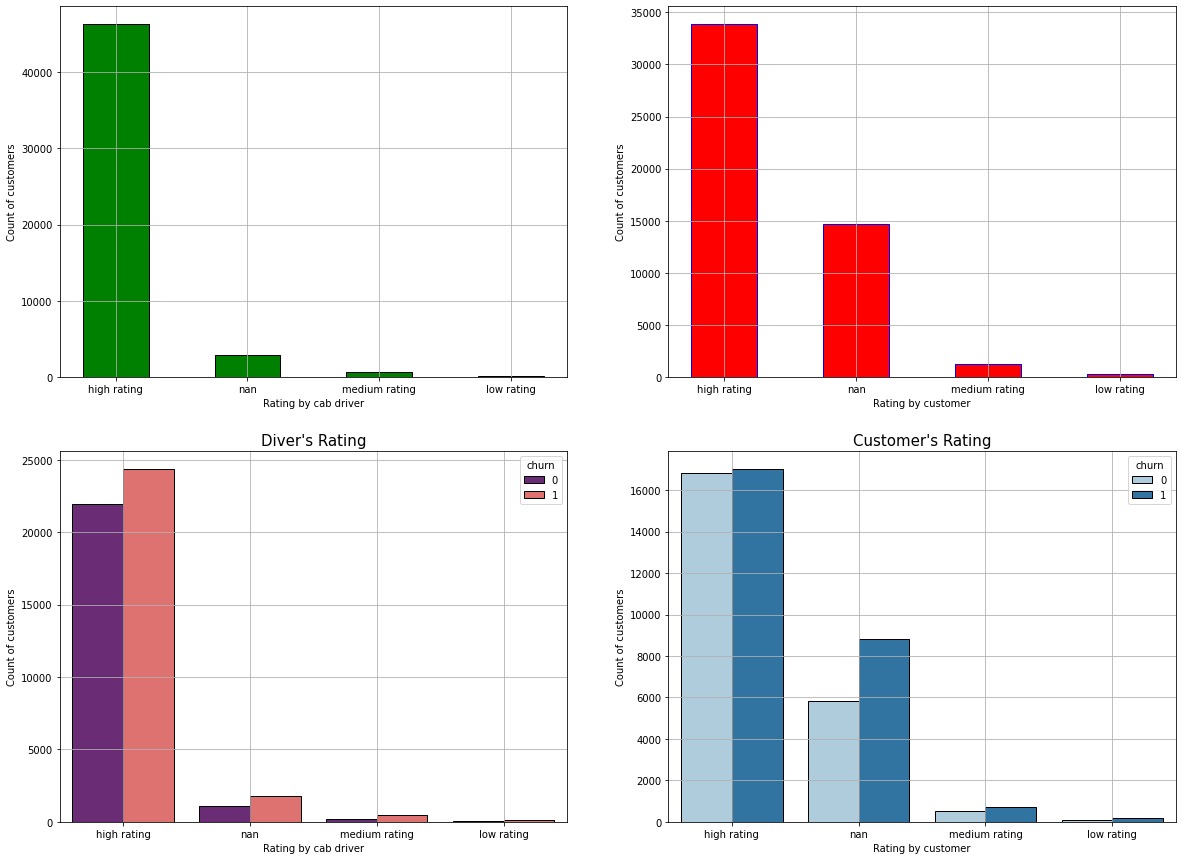

In [ ]:
plt.figure(figsize=(20,15))
plt.subplot(2, 2, 1)
plt.bar(df_dum['r_by_driver'].value_counts().index,df_dum['r_by_driver'].value_counts().values, color='g',edgecolor ='k', width=0.5) 
plt.xlabel('Rating by cab driver')
plt.ylabel('Count of customers')
plt.grid()

plt.subplot(2, 2, 2)
plt.bar(df_dum['r_of_driver'].value_counts().index,df_dum['r_of_driver'].value_counts().values,edgecolor ='b', width=0.5, color='r')
plt.xlabel('Rating by customer')
plt.ylabel('Count of customers')
plt.grid()

plt.subplot(2, 2, 3)
sns.countplot(data=df_dum, x='r_by_driver', hue='churn',palette='magma',edgecolor ='k') 
plt.xlabel('Rating by cab driver')
plt.ylabel('Count of customers')
plt.title("Diver's Rating", fontsize=15)
plt.grid()

plt.subplot(2, 2, 4)
sns.countplot(data=df_dum, x='r_of_driver', hue='churn',palette='Paired',edgecolor ='k') 
plt.xlabel('Rating by customer')
plt.ylabel('Count of customers')
plt.title("Customer's Rating", fontsize=15)
plt.grid()

Feedback is the most leathal weapon for a company to find a solution for n number of problem statements.
1. As we can see in the above subplots, reviwes from customer have a major missing values around 15,000, which might lead to an un-answered critical task that might need an immediate handelling.
2. Company have to come up with unique User Interface such as reward based feedback/rating system. In which customers and drivers will get reward if they report a grey area or area of improvement.
3. This reward base system will help to further enforce the relarion between customer - service provider - driver which in the end reduces the churn rate.

In [ ]:
pd.pivot_table(df_dum ,values='avg_dist', columns='r_by_driver', index='r_of_driver', aggfunc='sum')

r_by_driver,high rating,low rating,medium rating,nan
r_of_driver,,,,
high rating,175811.49,292.04,1402.96,7885.48
low rating,1232.07,33.91,90.70,320.84
medium rating,6012.02,13.82,286.12,623.97
nan,86343.31,473.12,1887.66,7131.82


In [ ]:
df.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'luxury_car_user', 'weekday_pct', 'churn'],
      dtype='object')

In [ ]:
df_dum.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn,r_by_driver,r_of_driver
0,3.67,5,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,0,high rating,high rating
1,8.26,5,5,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,1,high rating,high rating
2,0.77,5,4.3,1.00,Astapor,2014-07-01,iPhone,2014-06-01,0.0,3,False,100.0,0,high rating,high rating
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-10-01,20.0,9,True,80.0,0,high rating,high rating
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,1,high rating,high rating


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   avg_dist                50000 non-null  float64       
 1   avg_rating_by_driver    49799 non-null  float64       
 2   avg_rating_of_driver    41878 non-null  float64       
 3   avg_surge               50000 non-null  float64       
 4   city                    50000 non-null  object        
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   signup_date             50000 non-null  datetime64[ns]
 8   surge_pct               50000 non-null  float64       
 9   trips_in_first_30_days  50000 non-null  int64         
 10  luxury_car_user         50000 non-null  bool          
 11  weekday_pct             50000 non-null  float64       
 12  churn                   50000 non-null  int64 

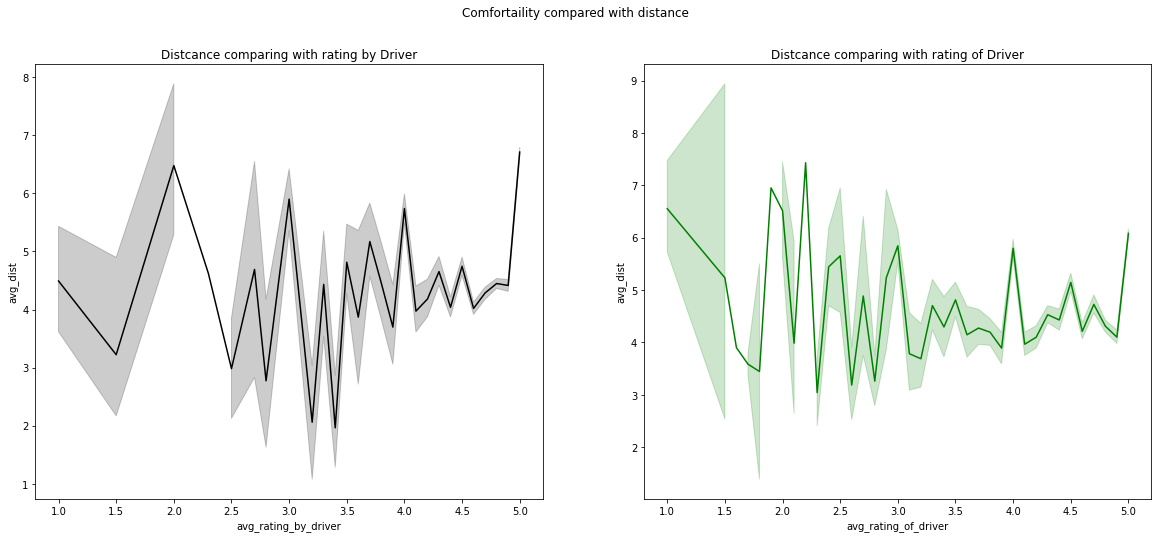

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1, 2, 1)
sns.lineplot(y=df['avg_dist'], x=df['avg_rating_by_driver'], color='k')
plt.title("Distcance comparing with rating by Driver")

plt.subplot(1, 2, 2)
sns.lineplot(y=df['avg_dist'], x=df['avg_rating_of_driver'], color='g')
plt.title("Distcance comparing with rating of Driver")

plt.suptitle("Comfortaility compared with distance")
plt.show()

Comfortaility compared with distance: 
1. When Comfortaility is compared with distance, we infered that the distance increases the comfortability of customers as well as of drivers.
2. When we plot a graph of avg-distance travelled by a customer with its rating we can see a sudden rise in trend in rating between 1.5-3.
3. This indicates us that as average distance of a customer increases, satisfaction of customer decreases.
4. At a certain point it might occur that customer is not all satisfied with services which again gives us a platform to keep entertaining customers so they might not churn in future.


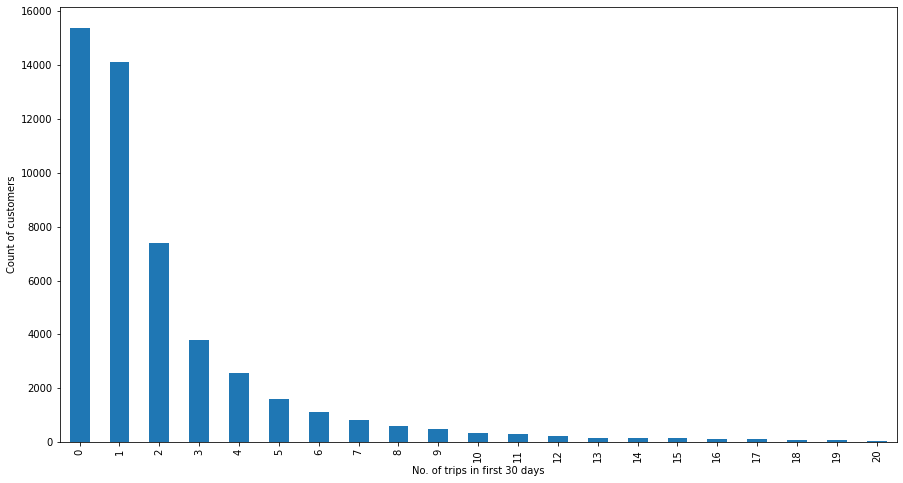

In [ ]:
plt.figure(figsize=(15,8))
df['trips_in_first_30_days'].value_counts().sort_index()[:21].plot(kind='bar')
plt.xlabel('No. of trips in first 30 days')
plt.ylabel('Count of customers')
plt.show()



### After registering to the ride share services, in the intial 30 days around 15400 number of customers have made 0 trips and around 14100 have booked services only once.
### This graph shows the count of customers who have made less number of trips in the initial 30 days only and they are more likely to be churned.

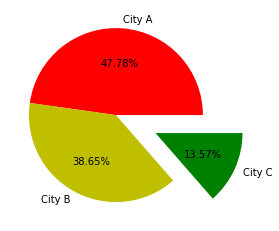

In [ ]:
df1 = df[df['churn']==1]

plt.pie(df1['city'].value_counts(),colors=['r','y','g'], autopct='%.2f%%',labels=['City A','City B','City C'], explode=[0,0,0.5])
plt.show()



## Most of the customers who are not using services are from City A. 
##i.e. City A should be the target area for promoting ride share services by providing some offers, cashbacks and improving overall customer experience.

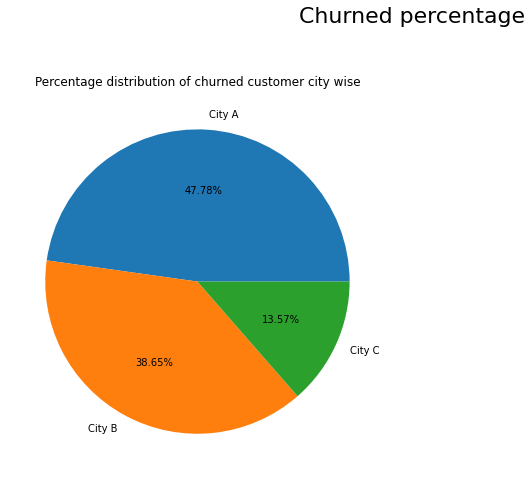

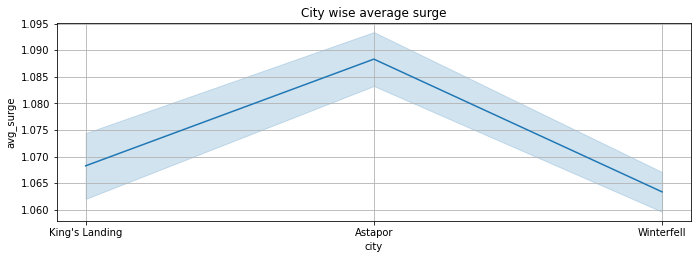

In [ ]:
plt.figure(figsize=(15,8))
plt.suptitle("Churned percentage",fontsize=22)
df1=df[df['churn']==1]
plt.subplot(1, 2, 1)
plt.pie(df1['city'].value_counts(),autopct='%.2f%%',labels=['City A','City B','City C'])
plt.title("Percentage distribution of churned customer city wise")
plt.show()
plt.figure(figsize=(25,8))
plt.subplot(2, 2, 2)
sns.lineplot(y=df1['avg_surge'], x=df['city'])
plt.title("City wise average surge")
plt.grid()
plt.show()

Above subplot gives us inference on percentage wise distribution of churned customers in each city. 
1. City A have highest percentage of churn rate which is around 47.78% followed by city B 38.65% and city C 13.57%.
2. According to the data we should focus on city A to decrease churn rate by providing new offers and promotion.
3. While comparing pie chart churned customers and line plot of average surge with respect to city we can say that surge is not the only parameter affecting churn rate of customer.
4. As churn rate of city A is higher we can diverge the drivers of city A to city B as average surge is higher compared to other cities.
5.When drivers are diverged it will reduce the surge on city B and flow of customer will increase and top of it, we can even assure drivers of more rides to earn money.


In [ ]:
df_dum['last_trip_dayname']=df_dum.loc[:,'last_trip_date'].dt.day_name()

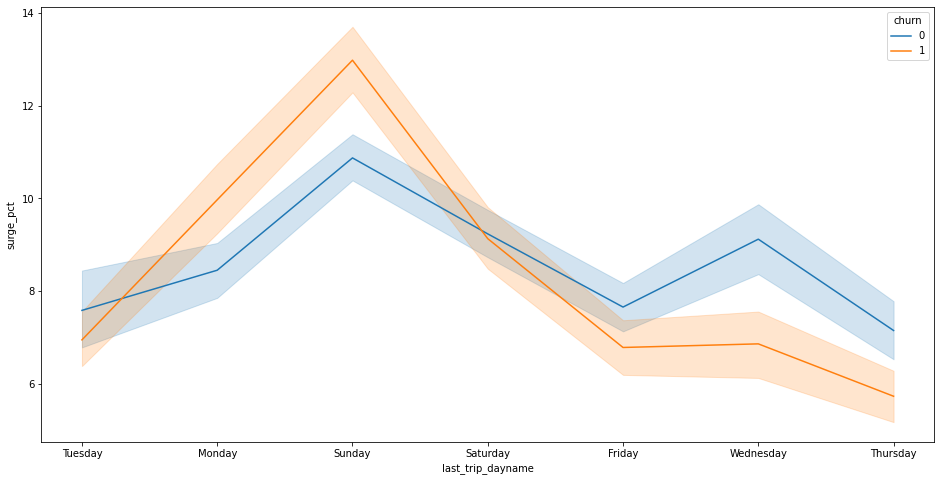

In [ ]:
plt.figure(figsize=(16,8))
sns.lineplot(data=df_dum, y='surge_pct',x='last_trip_dayname', hue='churn') 
plt.show()

#Surge_pct is higher for the customers on weekends is higher than on weekday.
#This shows the normal trend that the Surge pricing is higher on weekends due to increase in demand of more drivers in an area. 
#i.e. when riders in a given area are more than available drivers.
#This encourages more drivers to serve the busy area over time and shifts rider demand, to maintain reliability and restore balance.
#This helps drivers to earn incentive.

Surge_pct is higher for the customers on weekends is higher than on weekday.
1. This shows the normal trend that the Surge pricing is higher on weekends due to increase in demand of more drivers in an area. 
i.e., when riders in a given area are more than available drivers.
2. This encourages more drivers to serve the busy area over time and shifts rider demand, to maintain reliability and restore balance.
3. This helps drivers to earn incentive.
4. One of the inferences we can deduce that the customers who are not churned are actually facing higher surge when compared to the customers who have churned.
5. This shows us an area of improvement where we can provide extra efforts for loyal customer so in feature so they have same affinity toward this brand.


In [ ]:
df['phone'].fillna('Others', inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


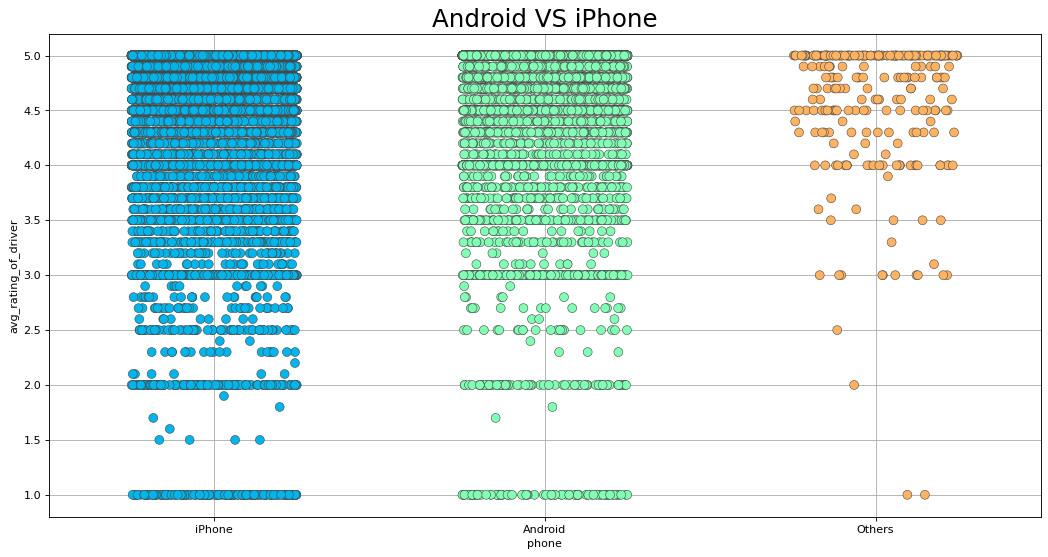

In [ ]:
fig, ax = plt.subplots(figsize=(16,8), dpi= 80)    
sns.stripplot(df.phone, df.avg_rating_of_driver, jitter=0.25, size=8, ax=ax, linewidth=.5, palette='rainbow')
plt.title('Android VS iPhone', fontsize=22)
plt.grid()
plt.show()

Phone feature in our dataset gives us information about the platform used by customers this company is using. 
1. We find many missing values in this independent variable.
2. Initially we decided to fill this null values with the most repetative platform in the data.
3. At the end of the day after researching about cab company platforms we get to know that, even if customers doesn't have an android or iphone or any device/smartphone customers can book a cab as long as they have a internet connection and a browers.
4. Internet and browser are the basic features provided by and cellphone manufacture.
5. Cab company provides a mini websites sutible for all types of browser usbale in mobile phones.
6. This graph let us know there are very less awareness in customer, so comapny should also focus on this in case of emergency. 
7. As we all know iPhone is all about is services and luxury but, as we can see in the above plot that span on iPhone customer is rating lies in a range of 3-5 which is a wider range of rating compared to Android.
8. There might be a possibility that iPhone customers are facing issues or bugs while booking a ride or facing issues while travelling. 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


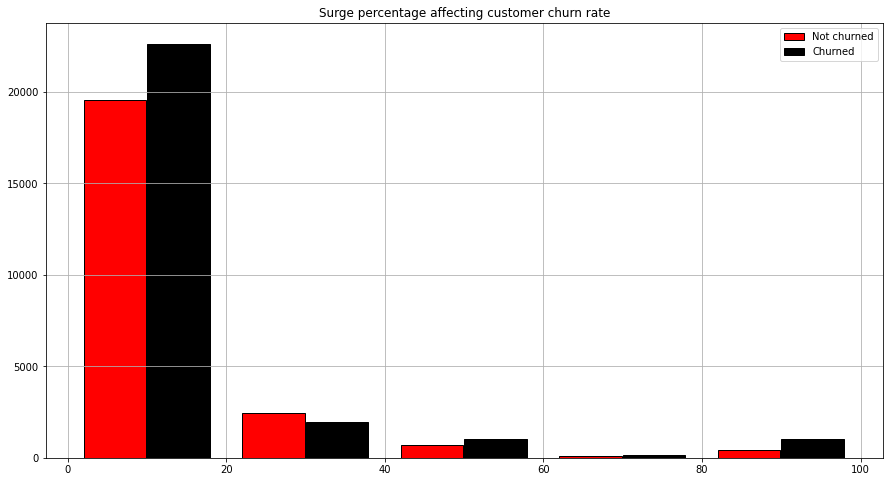

In [ ]:
x=df0['surge_pct']

y=df1['surge_pct'] 
plt. figure(figsize=(15,8))

plt.hist([x,y],bins=5, edgecolor='black', width=7.9, label=['Not churned', 'Churned'], color=['r','k']) 
plt.title('Surge percentage affecting customer churn rate') 
plt.grid()

plt.legend() 
plt.show()

This plot revels a static truth about churn behaviour of customers. ['surge_pct'] plays an important role for customers. 
1. As we can see in the above graph, major chunk of customers lies in range of 0 to 20 of ['surge_pct']. 
2. Customers churning between 0-20 range might have found a beter cab service with low surge percentage.
3. Customer churning rate is higher in range of 80-100.
4. There are also any customers who did not did not churn certain rise in ['surge_pct'] show's that they have brand affinity and stays loyal to this can service. For them we can provide various discounts/offers so we can retain these customers.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


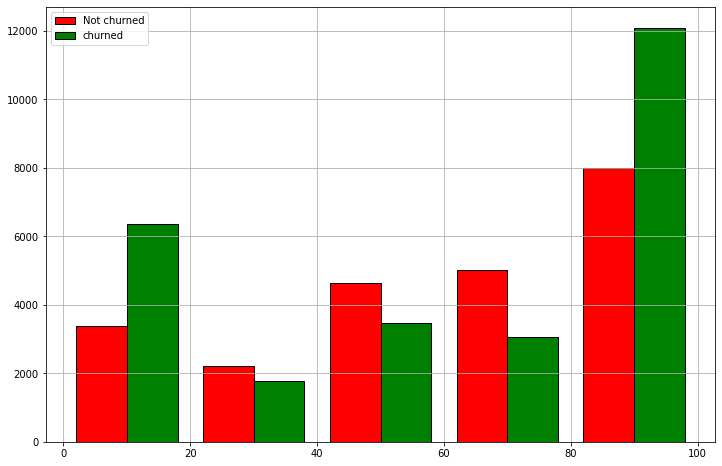

In [ ]:
x=df0['weekday_pct']
y=df1['weekday_pct']
plt.figure(figsize=(12,8))
plt.hist([x,y],bins=5,color=['r','g'], edgecolor='black',width=8, label=['Not churned','churned'])
plt.legend()
plt.grid()
plt.show()

As we have prooved that ['surge_pct'] is playing an important task while predicting the behaviour of customers. But from the above bargraph we can say that ['weekday_pct'] is also a parameter which is affecting churn rate a lot, ['weekday_pct'] is also prove to be critical to define the churn rate and customer behaviours. as surge increses on the week days customer tends to loose patience and more likey to churn. 

In [ ]:
#sns.lineplot(y=df['avg_surge'], x=df['city'])

In [ ]:
df.phone.unique()

array(['iPhone', 'Android', 'Others'], dtype=object)

#### REPLACING CITY NAMES WITH CITY A,B AND C:

In [ ]:
df['city'].replace({'Winterfell':'City A', 'Astapor': 'City B', "King's Landing": 'City C'}, inplace=True)

In [ ]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn
0,3.67,5.0,4.7,1.10,City C,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,0
1,8.26,5.0,5.0,1.00,City B,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,1
2,0.77,5.0,4.3,1.00,City B,2014-07-01,iPhone,2014-06-01,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,City C,2014-06-29,iPhone,2014-10-01,20.0,9,True,80.0,0
4,3.13,4.9,4.4,1.19,City A,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,1


# Treating Null Values of the Data:

In [ ]:
df.isnull().sum()/df.shape[0]*100

avg_dist                   0.000
avg_rating_by_driver       0.402
avg_rating_of_driver      16.244
avg_surge                  0.000
city                       0.000
last_trip_date             0.000
phone                      0.000
signup_date                0.000
surge_pct                  0.000
trips_in_first_30_days     0.000
luxury_car_user            0.000
weekday_pct                0.000
churn                      0.000
dtype: float64

#### Imputing values in "avg_rating_by_driver" and "avg_rating_of_driver":

#### Step 1: Check the distribution of columns, skewness and kurtosis of it.

Skewness of the avg_rating_by_driver:  -4.128909161682118
Kurtosis of the avg_rating_by_driver:  24.228354360460248


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


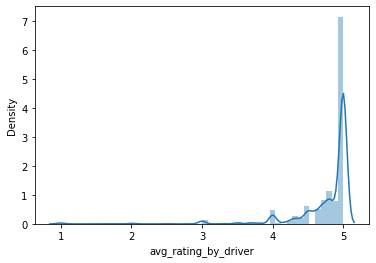


Skewness of the avg_rating_of_driver:  -2.4284849281100045
Kurtosis of the avg_rating_of_driver:  8.137954307885723


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


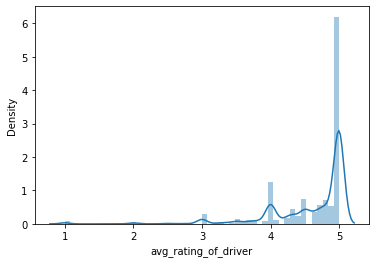

In [ ]:
print("Skewness of the avg_rating_by_driver: ",df['avg_rating_by_driver'].skew())
print("Kurtosis of the avg_rating_by_driver: ",df['avg_rating_by_driver'].kurt())
sns.distplot(df['avg_rating_by_driver'])
plt.show()


print("\nSkewness of the avg_rating_of_driver: ",df['avg_rating_of_driver'].skew())
print("Kurtosis of the avg_rating_of_driver: ",df['avg_rating_of_driver'].kurt())     #left skewed.
sns.distplot(df['avg_rating_of_driver'])
plt.show()


#### Both of the distributions are left skewed.
#### Now let's try to impute the missing values in these features without changing the distribution much.

The avg_rating_of_driver and avg_rating_by_driver are  ordinal categorical variables ranging from 0 to 5.

#### Step 2: Since both of the distributions are left skewed and also the percentage of missing values/null values is low. Therefore, we are trying to check the distribution of features after imputing missing values with median values of that feature itself.

Skewness of the avg_rating_by_driver after imputing the values with median:  -4.136590561683364
Kurtosis of the avg_rating_by_driver after imputing the values with median:  24.317413895217303


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


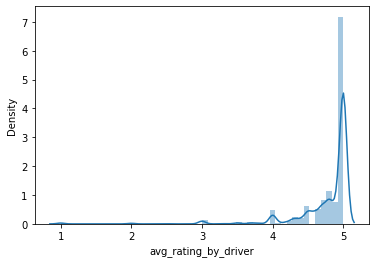

Skewness of the avg_rating_of_driver after imputing the values with median:  -2.7399264873481326
Kurtosis of the avg_rating_of_driver after imputing the values with median:  10.235191198073515


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


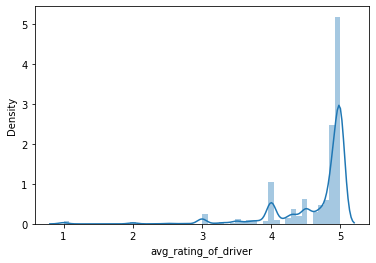

In [ ]:
print("Skewness of the avg_rating_by_driver after imputing the values with median: ",df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].median()).skew()) #skewness remains same 
print("Kurtosis of the avg_rating_by_driver after imputing the values with median: ",df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].median()).kurt()) #Kurtosis remains same 
sns.distplot(df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].median()))
plt.show()



print("Skewness of the avg_rating_of_driver after imputing the values with median: ",df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].median()).skew()) #skewness almost remains same 
print("Kurtosis of the avg_rating_of_driver after imputing the values with median: ",df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].median()).kurt()) #Kurtosis value changed a little
sns.distplot(df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].median()))
plt.show()



#### Since there is 16.244 % of the missing values in avg_rating_of_driver, replacing it with the median values will change the kurtosis value little bit. But it's insignificant. 

#### We can also try to look at the distribution after using Iterative Imputer.

In [ ]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn
0,3.67,5.0,4.7,1.10,City C,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,0
1,8.26,5.0,5.0,1.00,City B,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,1
2,0.77,5.0,4.3,1.00,City B,2014-07-01,iPhone,2014-06-01,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,City C,2014-06-29,iPhone,2014-10-01,20.0,9,True,80.0,0
4,3.13,4.9,4.4,1.19,City A,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,1


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
df_copy=df.select_dtypes(np.number)
it=IterativeImputer()
df_imputed=it.fit_transform(df_copy)

df_copy=pd.DataFrame(df_imputed,columns=df_copy.columns)
df_copy.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,churn
0,3.67,5.0,4.7,1.10,15.4,4.0,46.2,0.0
1,8.26,5.0,5.0,1.00,0.0,0.0,50.0,1.0
2,0.77,5.0,4.3,1.00,0.0,3.0,100.0,0.0
3,2.36,4.9,4.6,1.14,20.0,9.0,80.0,0.0
4,3.13,4.9,4.4,1.19,11.8,14.0,82.4,1.0


Skewness of the avg_rating_by_driver after imputing the values with median:  -4.135665049512903
Kurtosis of the avg_rating_by_driver after imputing the values with median:  24.325458311414923


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


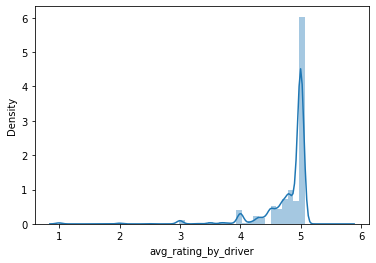

Skewness of the avg_rating_of_driver after imputing the values with median:  -2.6343432493231616
Kurtosis of the avg_rating_of_driver after imputing the values with median:  10.119939321721915


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


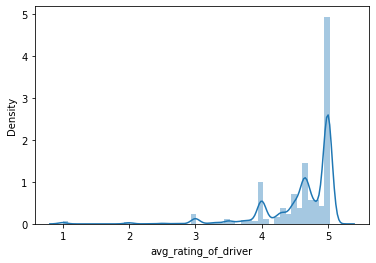

In [ ]:
print("Skewness of the avg_rating_by_driver after imputing the values with median: ",df_copy['avg_rating_by_driver'].skew()) #skewness remains same 
print("Kurtosis of the avg_rating_by_driver after imputing the values with median: ",df_copy['avg_rating_by_driver'].kurt()) #Kurtosis remains same 
sns.distplot(df_copy['avg_rating_by_driver'])
plt.show()

print("Skewness of the avg_rating_of_driver after imputing the values with median: ",df_copy['avg_rating_of_driver'].skew()) #skewness almost remains same 
print("Kurtosis of the avg_rating_of_driver after imputing the values with median: ",df_copy['avg_rating_of_driver'].kurt()) #Kurtosis value changed a little
sns.distplot(df_copy['avg_rating_of_driver'])
plt.show()

#### With Iterative Imputer the avg ratings were going beyond the limit of 5 and also we noticed -ve values in the result.
#### Therefore instead of using iterative imputer we are using median.

In [ ]:
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].median(),inplace=True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].median(),inplace=True)

#### Treating null/missing values from "Phone":
For the ‘phone’ we will create another category called ‘Others’ as there are other platforms as well through which a cab can be booked.


In [ ]:
df.isnull().sum()/df.shape[0]*100

avg_dist                  0.0
avg_rating_by_driver      0.0
avg_rating_of_driver      0.0
avg_surge                 0.0
city                      0.0
last_trip_date            0.0
phone                     0.0
signup_date               0.0
surge_pct                 0.0
trips_in_first_30_days    0.0
luxury_car_user           0.0
weekday_pct               0.0
churn                     0.0
dtype: float64

#### All the null values are treated .

#### After EDA, we found the anamoly that there are customers who have signed up with the app even after they have taken last_trip.


In [ ]:
x=df['last_trip_date']-df['signup_date']
x=x/ np.timedelta64(1, 'D')

#### Reference : https://stackoverflow.com/questions/18215317/extracting-days-from-a-numpy-timedelta64-value#:~:text=To%20extract%20the%20integer%20value,a%20timedelta%20of%20one%20day.&text=Or%2C%20as%20%40PhillipCloud%20suggested%2C,'%20%2C%20...).

In [ ]:
df['No_of_days_active']=x

In [ ]:
df=df[df['No_of_days_active']>=0]

#### Dropping the last_trip_date and signup_date and using no of days for further process

In [ ]:
df.drop(['last_trip_date','signup_date'],axis=1,inplace=True) 

In [ ]:
df.shape

(39108, 12)

In [ ]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn,No_of_days_active
0,3.67,5.0,4.7,1.10,City C,iPhone,15.4,4,True,46.2,0,143.0
1,8.26,5.0,5.0,1.00,City B,Android,0.0,0,False,50.0,1,96.0
2,0.77,5.0,4.3,1.00,City B,iPhone,0.0,3,False,100.0,0,30.0
4,3.13,4.9,4.4,1.19,City A,Android,11.8,14,False,82.4,1,47.0
6,3.95,4.0,4.9,1.00,City B,Android,0.0,1,False,100.0,1,1.0


#Machine Learning models and stats inference act as the lifeline of inferences. Exploratory Data Ansalysis and data pre-processing are use to eliminate the hidden anomaly present in the dataset which in-return increases the acurracy of ML models and clear image of inferences.
1. After completing our EDA and Data Pre-Processing techinique, as we were proceding for the feature selection processes, we were elimnating ['signup_date'] and ['last_trip_date'] to form a single feature names ['No_of_days_active'].
2. As we were featurization these features into a single independent variable, immoral values were turning up.
3. Let us try to justify this immoral values. Befor justifying thses values let us understand what does ['signup_date'] and ['last_trip_date'] means and what are there significance.
4. Feature ['signup_date'] infer about the date when the new user have signed up to the company cab services. 
5. Feature ['last_trip_date'] tells us when was the the last time the customer used their cab service.
6. We were trying to merge ['signup_date'] and ['last_trip_date'] to extract the number of days the customer was actively taking these services.
7. As ['signup_date'] and ['last_trip_date'] were in a 'object' format which we basically consider as categorical type of variable. We converted data type of these columns from 'object' to 'datetime' format.
7. Next we extracted the number of days by sbutracting ['last_trip_date'] from ['signup_date'].
8. At this point we all were thinking that ['signup_date'] will always be less then ['last_trip_date'] or same as we cannot take any cab services before signing up for it.
9. But we were all bewildered when we saw there were more than 10,000 observation showing dates which are negative. Denoting that last trip date is smaller than signup date i.e., customer were taking up cab services before signup.
10. This value are very immoral considering the procedure which company follows. This values were rejecting the very core hierarchy on which the company is made on.
11. On an initial phase we decided to drop both of these features and proceed for further statistics and ML model. Considering we don't have a data engineering team who have compiled this dataset neither we have a subject matter expert who can give us an insight on it. 
12. But after self researching about it we come to a conclusion that, ['signup_date'] and ['last_trip_date'] are not at fault the data is perfectly correct. 
13. While researching it is reveled that in 2014 Uber have launched a campaign, which stated that customers will get a it's first ride free.
14. If you have remembered every one of us might have used this promotion and get the free rides. But this campaign consist of a "grey area" or "loop hole"
which was exploited exponentially.
15. At the earlier phase of Gmail, Yahoo, Rediffmail, etc. these mail service provider dosen't have two step verification means that we can create multiple mail ID's on a single phone number. And that's the "loop hole" of this campaign.
16. Customer's use to take the first ride free and change the mail ID but the number remain constant. And this data-set might have been built on phone number as the anchor of the information.
17. This "loop hole" of phone number and mail ID's explains the immoral values present in the data-set.
18. On a later discussion didn't eliminated the features but droped the observarion's consist of negative number of days. As these are false or fraud record which have been captured. This clouded the prediction of Machine Learning prediction and inferences.
19. As we were not doing fradulant analysis on this data-set so we proceeded with-out these observation.
20. At our level this is the most critical level of analysis and without a data engineering team and a domain expert we cannot dig further in this data-set.

 STATISTICS:

#### Normality Test: 



Various statistical methods used for data analysis make assumptions about normality, including correlation, regression, t-tests, and analysis of variance. Central limit theorem states that when sample size has 100 or more observations, violation of the normality is not a major issue. Although for meaningful conclusions, assumption of the normality are still tested.

There are two main methods of assessing normality: Graphical and numerical (including statistical tests).

There are various methods available to test the normality of the continuous data, out of them, most popular methods are Shapiro–Wilk test, Kolmogorov–Smirnov test, skewness, kurtosis, histogram, box plot, Q–Q Plot. The two well-known tests of normality, namely, the Kolmogorov–Smirnov test, Anderson-Darlington Test and the Shapiro–Wilk test are most widely used methods to test the normality of the data.


The Shapiro–Wilk test is more appropriate method for small sample sizes (<50 samples) although it can also be used for handling larger sample size while Kolmogorov–Smirnov test is used for n ≥50.


# A: Anderson Darlington Test:

The test is a modified version of a more sophisticated nonparametric goodness-of-fit statistical test called the Kolmogorov-Smirnov test. A feature of the Anderson-Darling test is that it returns a list of critical values rather than a single p-value. This can provide the basis for a more thorough interpretation of the result.By default, the test will check against the Gaussian distribution (dist=’norm’).

### H0: Data is Normally Distributed.

### Ha: Data is not Normally Distributed.

Critical values in a statistical test are a range of pre-defined significance boundaries at which the H0 can be failed to be rejected if the calculated statistic is less than the critical value. Rather than just a single p-value, the test returns a critical value for a range of different commonly used significance levels. We can interpret the results by failing to reject the null hypothesis that the data is normal if the calculated test statistic is less than the critical value at a chosen significance level. We can see that at each significance level, the test has found that the data follows a normal distribution

Reference : https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6350423/

In [ ]:
import scipy.stats as stats
from scipy.stats import anderson

In [ ]:
for i in df.select_dtypes(np.number).columns:
    print(f'Feature: {i}')
    result = anderson(df[i])
    print('Statistic: %.3f' % result.statistic)
    p = 0
    for j in range(len(result.critical_values)):
        sl, cv = result.significance_level[j], result.critical_values[j]
        if result.statistic < result.critical_values[j]:
            print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
        else:
            print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))
    print('\n'*3)

Feature: avg_dist
Statistic: 2962.540
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)




Feature: avg_rating_by_driver
Statistic: 5588.448
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)




Feature: avg_rating_of_driver
Statistic: 4481.099
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)




Feature: avg_surge
Statistic: 8431.715
15.000: 0.576, data does 

# B: Numerical-Numerical Analysis:

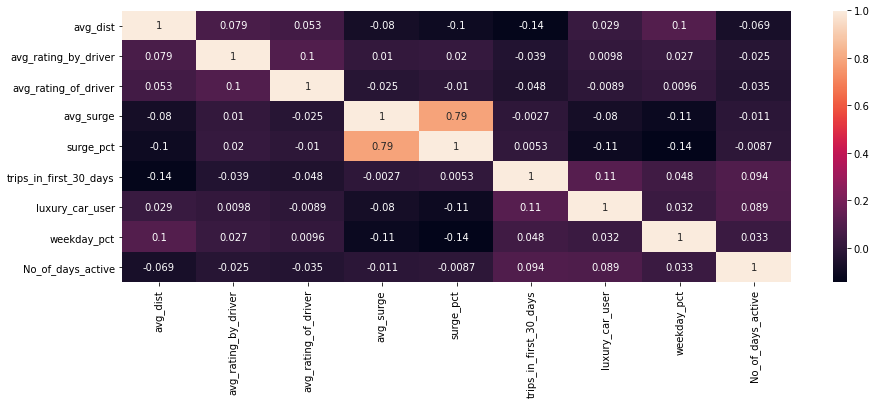

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(df.drop('churn',axis=1).corr(),annot=True)
plt.show()

#### Conclusion from Numerical-Numerical feature analysis:
1. The avg_surge and surge_pct are showing maximum positive correlation of 0.79.
2. Others features are not highly correleated to each other

# C: T-Test (Numerical- Categorical Analysis)

H0: The distributions of churned customers and customers who are continuing services differ from each other on basis of the feature selected.
    
Ha: The distributions of churned customers and customers who are continuing services DO NOT differ from each other on basis of the feature selected.

In [ ]:
import scipy.stats as stats

In [ ]:
for i in df.select_dtypes(np.number):
    a=df[df['churn']==1][i]
    b=df[df['churn']==0][i]
    #print(f'P-value for {i}:',stats.ttest_ind(a,b)[1])
    print(i.upper(),':')
    p=stats.ttest_ind(a,b)[1]
    if p<0.05:
        print(f'Rejecting null hypothesis. i.e. The distributions of churned customers and customers who are continuing services differ from each other on basis of the {i}')
    else:
        print(f'Failed to reject null hypothesis. i.e. The distributions of churned customers and customers who are continuing services do not differ from each other on basis of the {i}')
    print('\n')

AVG_DIST :
Rejecting null hypothesis. i.e. The distributions of churned customers and customers who are continuing services differ from each other on basis of the avg_dist


AVG_RATING_BY_DRIVER :
Rejecting null hypothesis. i.e. The distributions of churned customers and customers who are continuing services differ from each other on basis of the avg_rating_by_driver


AVG_RATING_OF_DRIVER :
Rejecting null hypothesis. i.e. The distributions of churned customers and customers who are continuing services differ from each other on basis of the avg_rating_of_driver


AVG_SURGE :
Failed to reject null hypothesis. i.e. The distributions of churned customers and customers who are continuing services do not differ from each other on basis of the avg_surge


SURGE_PCT :
Failed to reject null hypothesis. i.e. The distributions of churned customers and customers who are continuing services do not differ from each other on basis of the surge_pct


TRIPS_IN_FIRST_30_DAYS :
Rejecting null hypothesis

Conclusion from t-test independent :
weekday_pct,surge_pct and avg_surge came out to be insignificant for prediction of churn. As wrt to churn,p values are larger and the distributions are overlapping with each other. Therefore, on basis of these three features it is difficult to predict churn. But we will still use RFE and SFS to see the significant no of features.

All the other features are significant for prediction of churn as p value<0.05 and there is more seperation between the distributions wrt to churn.


### Note: 
p value smaller--> more seperation between distributions--> rejecting null with more confidence-->
stronger relationship between categorical(Churn) and numerical(Independent var.) 

# D: CHI SQUARE :

H0: The groups are independent 

Ha: The groups are dependent on each other.

#### A: City

In [ ]:
x=pd.crosstab(df['city'],df['churn'])
x

churn,0,1
city,,
City A,8942,9231
City B,5370,7599
City C,5415,2551


In [ ]:
p_val=stats.chi2_contingency(x)[1]

if p_val<0.05:
    print('Reject null hypothesis. i.e. The Churn rate of the customers is dependent on City')
else:
    print('Failed to Reject null hypothesis. i.e. The Churn rate of the customers does NOT depend on City')

Reject null hypothesis. i.e. The Churn rate of the customers is dependent on City


#### B: Phone

In [ ]:
df.head(2)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn,No_of_days_active
0,3.67,5.0,4.7,1.1,City C,iPhone,15.4,4,True,46.2,0,143.0
1,8.26,5.0,5.0,1.0,City B,Android,0.0,0,False,50.0,1,96.0


In [ ]:
x=pd.crosstab(df['phone'],df['churn'])
x

churn,0,1
phone,,
Android,4502,7241
Others,163,162
iPhone,15062,11978


In [ ]:
p_val=stats.chi2_contingency(x)[1]

if p_val<0.05:
    print('Reject null hypothesis. i.e. The Churn rate of the customers is dependent on type of Phone')
else:
    print('Failed to Reject null hypothesis. i.e. The Churn rate of the customers does NOT depend on type of Phone')

Reject null hypothesis. i.e. The Churn rate of the customers is dependent on type of Phone


#### C: Luxury_car_User:

In [ ]:
x=pd.crosstab(df['luxury_car_user'],df['churn'])
x

churn,0,1
luxury_car_user,,
False,11005,13404
True,8722,5977


In [ ]:
p_val=stats.chi2_contingency(x)[1]

if p_val<0.05:
    print('Reject null hypothesis. i.e. The Churn rate of the customers is dependent on luxury_car_user')
else:
    print('Failed to Reject null hypothesis. i.e. The Churn rate of the customers does NOT depend on luxury_car_user')

Reject null hypothesis. i.e. The Churn rate of the customers is dependent on luxury_car_user


#### Conclusion of Chi-Square test:

All the three categorical variables are significant in prediction of Churn

# Preparation of Data:

#### Dropping ID column:

In [ ]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn,No_of_days_active
0,3.67,5.0,4.7,1.10,City C,iPhone,15.4,4,True,46.2,0,143.0
1,8.26,5.0,5.0,1.00,City B,Android,0.0,0,False,50.0,1,96.0
2,0.77,5.0,4.3,1.00,City B,iPhone,0.0,3,False,100.0,0,30.0
4,3.13,4.9,4.4,1.19,City A,Android,11.8,14,False,82.4,1,47.0
6,3.95,4.0,4.9,1.00,City B,Android,0.0,1,False,100.0,1,1.0


In [ ]:
#df.drop('ID',axis=1,inplace=True)

In [ ]:
df.shape

(39108, 12)

# Transformation:

#### Outlier Treatment:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


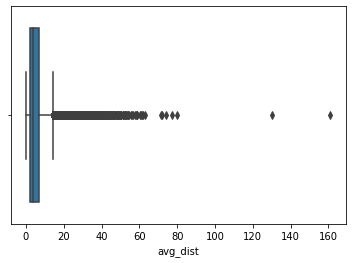

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


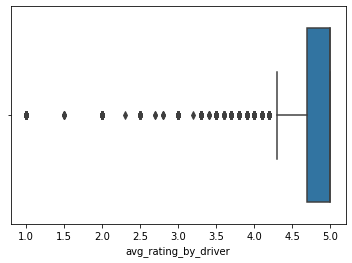

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


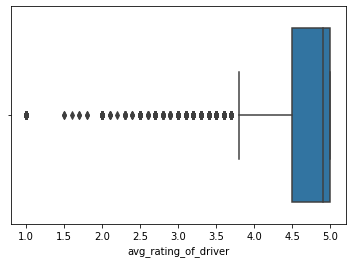

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


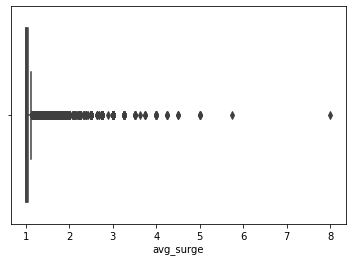

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


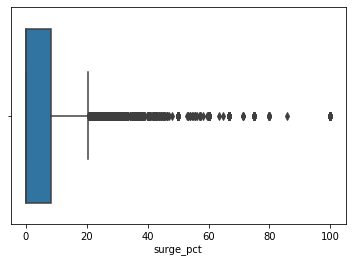

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


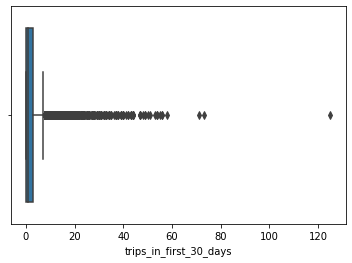

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


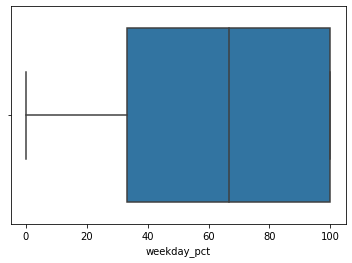

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


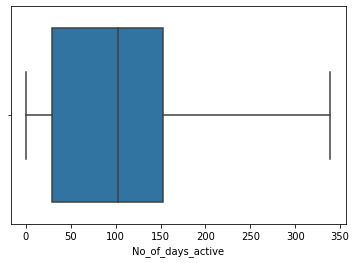

In [ ]:
for i in df.drop('churn',axis=1).select_dtypes('number'):
    sns.boxplot(df[i])
    plt.show()

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer() 

skew=pd.DataFrame(df.skew(),columns=['Initial skewness of data'], index=df.select_dtypes(np.number).columns)
skew
for i in df.select_dtypes(np.number):
  skew.loc[i,'Log']=np.log1p(df[i]).skew()
  skew.loc[i,'Sqrt']=np.sqrt(df[i]).skew()
  skew.loc[i,'Reciprocal']=np.reciprocal(df[i]).skew()
  skew.loc[i,'Square']=np.square(df[i]).skew()
  skew.loc[i,'Exponential']=np.exp(df[i]).skew()
s=pd.DataFrame(pt.fit_transform(df.select_dtypes(np.number))).skew()
skew['PowerTransform']=s.values
skew


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Initial skewness of data,Log,Sqrt,Reciprocal,Square,Exponential,PowerTransform
avg_dist,3.500755,0.535933,1.328133,NaN,43.256141,197.757427,0.010223
avg_rating_by_driver,-4.149630,-6.107514,-5.367919,11.795030,-2.850634,-1.621381,-0.881958
avg_rating_of_driver,-2.758217,-4.157066,-3.614995,9.062542,-1.896859,-1.113590,-0.786610
avg_surge,6.995161,4.859109,5.204415,-3.054548,18.601447,186.929681,1.257356
surge_pct,3.163954,1.179539,1.702115,NaN,4.784836,5.526723,0.882423
trips_in_first_30_days,5.473589,0.757468,1.071898,-0.903914,56.935132,197.757427,0.094733
weekday_pct,-0.476946,-1.404823,-1.058136,NaN,0.080791,0.666655,-0.740668
churn,0.017696,0.017696,0.017696,0.017696,0.017696,0.017696,0.017696
No_of_days_active,0.517725,-1.213170,-0.419657,NaN,2.256899,NaN,-0.378436


#### As we are getting better results with power transform, we will use power transform.

In [ ]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn,No_of_days_active
0,3.67,5.0,4.7,1.10,City C,iPhone,15.4,4,True,46.2,0,143.0
1,8.26,5.0,5.0,1.00,City B,Android,0.0,0,False,50.0,1,96.0
2,0.77,5.0,4.3,1.00,City B,iPhone,0.0,3,False,100.0,0,30.0
4,3.13,4.9,4.4,1.19,City A,Android,11.8,14,False,82.4,1,47.0
6,3.95,4.0,4.9,1.00,City B,Android,0.0,1,False,100.0,1,1.0


In [ ]:
cols=list(df.drop('churn',axis=1).select_dtypes('number').columns)
cols
df[cols]=pt.fit_transform(df[cols])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


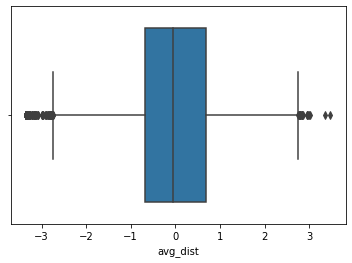

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


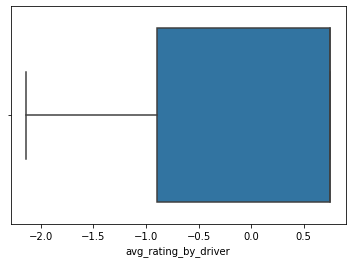

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


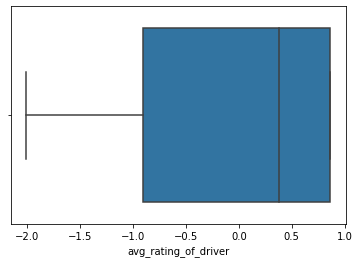

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


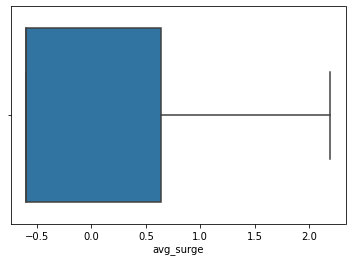

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


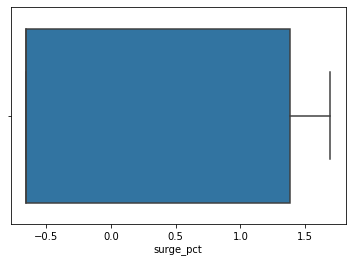

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


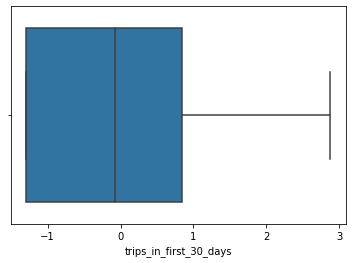

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


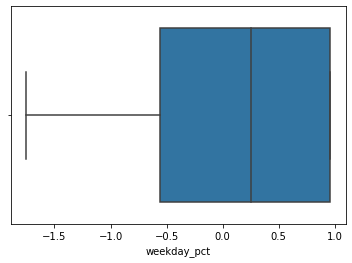

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


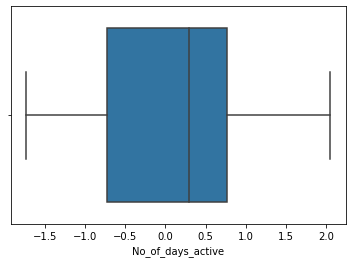

In [ ]:
for i in df.drop('churn',axis=1).select_dtypes('number'):
    sns.boxplot(df[i])
    plt.show()

#### As, now from above boxplot we can see that number of outliers have been significantly reduced. 
#### Therefore, Outlier treatment successfully completed by applying power transform

In [ ]:
df['luxury_car_user']=df['luxury_car_user'].astype('object')

In [ ]:
df= pd.get_dummies(df, drop_first= True)

In [ ]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,churn,No_of_days_active,city_City B,city_City C,phone_Others,phone_iPhone,luxury_car_user_True
0,-0.147695,0.752986,-0.369485,1.316118,1.521830,1.083613,-0.227908,0,0.680303,0,1,0,1,1
1,0.870954,0.752986,0.864403,-0.602591,-0.657608,-1.299238,-0.134553,1,0.218503,1,0,0,0,0
2,-1.991528,0.752986,-1.269609,-0.602591,-0.657608,0.842826,0.959672,0,-0.711034,1,0,0,1,0
4,-0.353230,0.052937,-1.101700,1.870774,1.470088,1.984694,0.597024,1,-0.413797,0,0,0,0,0
6,-0.052860,-1.998738,0.381881,-0.602591,-0.657608,-0.070335,0.959672,1,-1.637241,1,0,0,0,0


In [ ]:
df.shape

(39108, 14)

In [ ]:
#df.to_csv('Deck Cab(1)_cleaned.csv')

# Checking imbalance in the data:

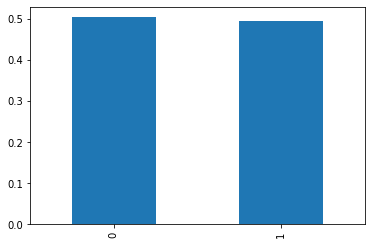

In [ ]:
df['churn'].value_counts(normalize=True).plot(kind='bar')
plt.show()

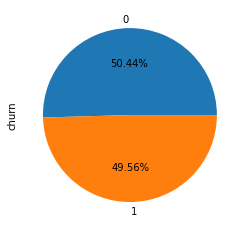

In [ ]:
df['churn'].value_counts(normalize=True).plot(kind='pie',autopct='%.2f%%')
plt.show()

#### The target variable is pretty balanced. So we will not use any oversampling or undersampling techniques.

# BASE MODEL

In [ ]:
y=df['churn']                                     
x=df.drop(['churn'],axis=1)
import statsmodels.api as sm


xc=sm.add_constant(x)

model=sm.Logit(y,xc).fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.444456
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                39108
Model:                          Logit   Df Residuals:                    39094
Method:                           MLE   Df Model:                           13
Date:                Fri, 16 Apr 2021   Pseudo R-squ.:                  0.3587
Time:                        16:28:16   Log-Likelihood:                -17382.
converged:                       True   LL-Null:                       -27106.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.5706      0.030     19.222      0.000       0.512       0.629
avg_dist                   0.0069      0.014      0.495      0.620      -0.021       0.034
avg_rating_by_driver       0.0295      0.014      2.100      0.036       0.002       0.057
avg_rating_of_driver       0.0144      0.014      1.049      0.294      -0.012       0.041
avg_surge                  0.2448      0.042      5.889      0.000       0.163       0.326
surge_pct                 -0.2999      0.043     -7.013      0.000      -0.384      -0.216
trips_in_first_30_days    -0.3528      0.014    -24.707      0.000      -0.381      -0.325
weekday_pct                0.0861      0.014      6.150      0.000       0.059       0.114
No_of_days_active         -1.7312      0.019    -93.163      0.000      -1.768      -1.695
city_City B                0.4182      0.030     13.725      0.000       0.358       0.478
city_City C               -0.5690      0.037    -15.248      0.000      -0.642      -0.496
phone_Others              -0.6700      0.153     -4.366      0.000      -0.971      -0.369
phone_iPhone              -0.5283      0.029    -17.959      0.000      -0.586      -0.471
luxury_car_user_True      -0.4143      0.028    -14.783      0.000      -0.469      -0.359
==========================================================================================
"""

#### INTERPRETATION:

1. LOG(ODDS)=0.5706+0.0295(avg_rating_by_driver)+0.0144(avg_rating_of_driver)+0.2448(avg_surge)-0.2999(surge_pct)
              -0.3528(trips_in_first_30_days)+0.0861(weekday_pct)-1.7312(No_of_days_active)+0.4182(city_City B)
              -0.5690(city_City C)-0.6700(phone_Others)-0.5283(phone_iPhone)-0.4143(luxury_car_user_True)

# Backward elimination on base model to identify significant features 


In [ ]:

cols = list(xc.columns)
print('\n'*3,'The columns which are initially present in the dataframe:\n',cols)


while len(cols)>1:
    X1 = xc[cols]
    model=sm.Logit(y,X1).fit()
    pvalues = model.pvalues
    pvalues = pvalues.drop('const')
    max_p = max(pvalues)
    feature_maxp = pvalues.idxmax()
    if max_p>0.05:
        cols.remove(feature_maxp)
        print(feature_maxp, max_p)
    else:
        break
        
selected_features=cols
print('\n'*3,'SELECTED FEATURES:\n',selected_features)






 The columns which are initially present in the dataframe:
 ['const', 'avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'trips_in_first_30_days', 'weekday_pct', 'No_of_days_active', 'city_City B', 'city_City C', 'phone_Others', 'phone_iPhone', 'luxury_car_user_True']
Optimization terminated successfully.
         Current function value: 0.444456
         Iterations 6
avg_dist 0.6203720587848482
Optimization terminated successfully.
         Current function value: 0.444459
         Iterations 6
avg_rating_of_driver 0.29039150474493136
Optimization terminated successfully.
         Current function value: 0.444474
         Iterations 6



 SELECTED FEATURES:
 ['const', 'avg_rating_by_driver', 'avg_surge', 'surge_pct', 'trips_in_first_30_days', 'weekday_pct', 'No_of_days_active', 'city_City B', 'city_City C', 'phone_Others', 'phone_iPhone', 'luxury_car_user_True']


# Checking multicollinearity:

In [ ]:
y=df['churn']
x=df.drop('churn',axis=1)
import statsmodels.api as sm
xc=sm.add_constant(x)
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vf=[ vif(xc.values,i)   for i in range(xc.shape[1])]

pd.DataFrame(vf, index=xc.columns, columns=['Vif'])

,Vif
const,4.917784
avg_dist,1.046031
avg_rating_by_driver,1.152403
avg_rating_of_driver,1.073180
avg_surge,9.215963
surge_pct,9.799270
trips_in_first_30_days,1.218072
weekday_pct,1.033068
No_of_days_active,1.146664
city_City B,1.172719


In [ ]:
print(df.surge_pct.skew(),df.avg_surge.skew())

0.8824228001127774 1.2573564129122325


#### Since,both the VIF values for avg_surge and surge_pct are almost same. We checked value of skewness for avg_surge and surge_pct. The skewness of avg_surge is higher so we will remove avg_surge and check multicollinearity between all the independent variables again

In [ ]:
y=df['churn']
x=df.drop(['churn','avg_surge'],axis=1)
import statsmodels.api as sm
xc=sm.add_constant(x)
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vf=[ vif(xc.values,i)   for i in range(xc.shape[1])]

pd.DataFrame(vf, index=xc.columns, columns=['Vif'])

,Vif
const,4.914711
avg_dist,1.046017
avg_rating_by_driver,1.148648
avg_rating_of_driver,1.073180
surge_pct,1.179833
trips_in_first_30_days,1.180728
weekday_pct,1.028663
No_of_days_active,1.134136
city_City B,1.171966
city_City C,1.212737


#### Now there is no serious multicollinearity left in the dataset.

# Fitting Selected Features in the Logistic Regression:

In [ ]:
x=df.drop(['churn','avg_dist','avg_rating_of_driver','avg_surge'],axis=1)
y=df['churn']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

lr.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve

def train_test_evaluation(model,x_train,y_train,x_test,y_test):
    y_train_pred = model.predict(x_train)
    y_train_prob = model.predict_proba(x_train)[:,1]


    print('Accuracy of train',accuracy_score(y_train,y_train_pred))
    print('Confusion matrix of train\n',confusion_matrix(y_train,y_train_pred))
    print('ROC-AUC score of train',roc_auc_score(y_train,y_train_prob))


    y_test_pred = model.predict(x_test)

    y_test_prob = model.predict_proba(x_test)[:,1]

    print('\nAccuracy of test',accuracy_score(y_test,y_test_pred))
    print('Confusion matrix of test\n',confusion_matrix(y_test,y_test_pred))
    print('ROC-AUC score of test',roc_auc_score(y_test,y_test_prob))

In [ ]:
train_test_evaluation(lr,X_train,y_train,X_test,y_test)

Accuracy of train 0.8014611872146119
Confusion matrix of train
 [[11500  2365]
 [ 3070 10440]]
ROC-AUC score of train 0.8847450099737797

Accuracy of test 0.7968124094434501
Confusion matrix of test
 [[4860 1002]
 [1382 4489]]
ROC-AUC score of test 0.8820545428521468


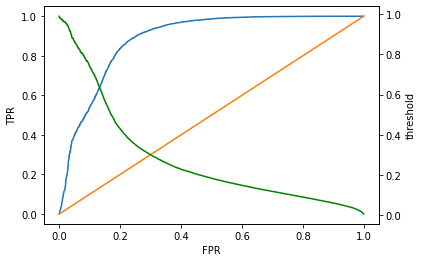

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

y_train_prob = lr.predict_proba(X_train)[:,1]

fpr, tpr, thresh = roc_curve(y_train,y_train_prob)
thresh[0] = thresh[0]-1

fig,ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot(fpr, fpr)
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax1=ax.twinx()
ax1.plot(fpr, thresh,color='g')
ax1.set_ylabel('threshold')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
y_train_pred = lr.predict(X_train)


print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81     13865
           1       0.82      0.77      0.79     13510

    accuracy                           0.80     27375
   macro avg       0.80      0.80      0.80     27375
weighted avg       0.80      0.80      0.80     27375



In [ ]:
y_test_pred = lr.predict(X_test)


print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80      5862
           1       0.82      0.76      0.79      5871

    accuracy                           0.80     11733
   macro avg       0.80      0.80      0.80     11733
weighted avg       0.80      0.80      0.80     11733



# RFE:


#### Crossvalidation for selecting the best number of features

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
rfe=RFE(lr)

params={'n_features_to_select': list(range(1,12))} #no of columns

gsearch=GridSearchCV(rfe, param_grid=params, scoring='roc_auc', cv=3, 
                     return_train_score=True)
gsearch.fit(x,y)

GridSearchCV(cv=3, error_score=nan,
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                  11]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [ ]:
gsearch.best_params_

{'n_features_to_select': 1}

In [ ]:
pd.DataFrame(gsearch.cv_results_).iloc[:,5:].head(3)

,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,{'n_features_to_select': 1},0.886327,0.884148,0.884290,0.884922,0.000995,1,0.884227,0.885302,0.885245,0.884925,0.000494
1,{'n_features_to_select': 2},0.881274,0.880071,0.879455,0.880267,0.000756,11,0.879459,0.880620,0.880764,0.880281,0.000584
2,{'n_features_to_select': 3},0.881387,0.880103,0.879419,0.880303,0.000816,10,0.879485,0.880658,0.880839,0.880327,0.000600


In [ ]:
# 1 optimal feature.

In [ ]:
n_features_optimal=1

lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(x, y)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=1, step=1, verbose=0)

In [ ]:
pd.DataFrame(rfe.ranking_, index=x.columns, columns=['rank']).sort_values(by='rank')

,rank
No_of_days_active,1
city_City C,2
phone_Others,3
phone_iPhone,4
trips_in_first_30_days,5
luxury_car_user_True,6
city_City B,7
surge_pct,8
weekday_pct,9
avg_rating_by_driver,10


# SFS:


In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
lr = LogisticRegression()
sfs1 = sfs(lr, k_features=10, forward=True, scoring='roc_auc', cv=3)
sfs1.fit(x, y)

SequentialFeatureSelector(clone_estimator=True, cv=3,
                          estimator=LogisticRegression(C=1.0, class_weight=None,
                                                       dual=False,
                                                       fit_intercept=True,
                                                       intercept_scaling=1,
                                                       l1_ratio=None,
                                                       max_iter=100,
                                                       multi_class='auto',
                                                       n_jobs=None,
                                                       penalty='l2',
                                                       random_state=None,
                                                       solver='lbfgs',
                                                       tol=0.0001, verbose=0,
                                                       warm_start=False),

In [ ]:
sf=pd.DataFrame(sfs1.subsets_).T


In [ ]:
sf[sf['avg_score']==sf['avg_score'].max()]

,feature_idx,cv_scores,avg_score,feature_names
1,"(4,)","[0.8863086074326003, 0.8841621752427441, 0.884...",0.884919,"(No_of_days_active,)"


In [ ]:
list(sf[sf['avg_score']==sf['avg_score'].max()]['feature_names'])

[('No_of_days_active',)]

# Decision Tree:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier()

dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

from sklearn.tree import export_graphviz
from IPython.display import Image

import pydotplus

features= X_train_US.columns
dot_data=export_graphviz(dtc, out_file=None, feature_names= features)

graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png)

In [ ]:
from sklearn.tree import export_graphviz 
from IPython.display import Image

import pydotplus

features= df.columns 

dot_data=export_graphviz(dtc, out_file=None, feature_names= features)

graph=pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png)

ValueError: ignored

In [ ]:
train_test_evaluation(dtc,X_train,y_train,X_test,y_test)

Accuracy of train 0.9708858447488584
Confusion matrix of train
 [[13459   406]
 [  391 13119]]
ROC-AUC score of train 0.9975463087405971

Accuracy of test 0.8512741839256797
Confusion matrix of test
 [[5002  860]
 [ 885 4986]]
ROC-AUC score of test 0.8678131196826387


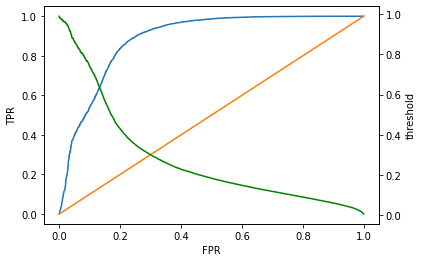

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresh = roc_curve(y_train,y_train_prob)
thresh[0] = thresh[0]-1

fig,ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot(fpr, fpr)
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax1=ax.twinx()
ax1.plot(fpr, thresh,color='g')
ax1.set_ylabel('threshold')
plt.show()

# hypertuning of decision tree by Randomized SearchCV:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_dist={ 'max_depth': sp_randint(2,8),
            'min_samples_split':sp_randint(2,50),
            'min_samples_leaf': sp_randint(1,50),
            'criterion': ['gini','entropy']}

rsearch= RandomizedSearchCV(dtc, param_dist, scoring='roc_auc', cv=3, n_iter=250, random_state=4, n_jobs=-1)


rsearch.fit(X_train,y_train)
rsearch.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 48,
 'min_samples_split': 18}

In [ ]:
best_params=rsearch.best_params_


dtc=DecisionTreeClassifier(**best_params)
dtc.fit(X_train,y_train)
train_test_evaluation(dtc,X_train,y_train,X_test,y_test)

Accuracy of train 0.8799269406392695
Confusion matrix of train
 [[11231  2634]
 [  653 12857]]
ROC-AUC score of train 0.9465692066594366

Accuracy of test 0.8749680388647405
Confusion matrix of test
 [[4709 1153]
 [ 314 5557]]
ROC-AUC score of test 0.9378527921563472


In [ ]:
y_test_pred = dtc.predict(X_test)


print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.80      0.87      5862
           1       0.83      0.95      0.88      5871

    accuracy                           0.87     11733
   macro avg       0.88      0.87      0.87     11733
weighted avg       0.88      0.87      0.87     11733



# Random Forest:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

rfc.fit(X_train,y_train)
train_test_evaluation(rfc,X_train,y_train,X_test,y_test)

Accuracy of train 0.9708858447488584
Confusion matrix of train
 [[13345   520]
 [  277 13233]]
ROC-AUC score of train 0.9960646158913686

Accuracy of test 0.8752237279468167
Confusion matrix of test
 [[4946  916]
 [ 548 5323]]
ROC-AUC score of test 0.9432893064645131


# hypertuning of random forest by Randomized SearchCV:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_dist={ 'n_estimators': sp_randint(25,250)
            ,'max_depth': sp_randint(2,8),
            'max_features' : sp_randint(1,7),
            'min_samples_split':sp_randint(2,50),
            'min_samples_leaf': sp_randint(1,20),    #should be higher than 50, if less it captures noises
            'criterion': ['gini','entropy']}

rsearch= RandomizedSearchCV(rfc, param_dist, scoring='roc_auc', cv=3, n_iter=250, random_state=4, n_jobs=-1)


rsearch.fit(X_train,y_train)
rsearch.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 21,
 'n_estimators': 233}

In [ ]:
best_params=rsearch.best_params_

rfc=RandomForestClassifier(**best_params)
rfc.fit(X_train,y_train)

train_test_evaluation(rfc,X_train,y_train,X_test,y_test)

Accuracy of train 0.8842009132420091
Confusion matrix of train
 [[11198  2667]
 [  503 13007]]
ROC-AUC score of train 0.9541926043216241

Accuracy of test 0.875735106110969
Confusion matrix of test
 [[4665 1197]
 [ 261 5610]]
ROC-AUC score of test 0.9466438411053155


In [ ]:
y_test_pred = rfc.predict(X_test)


print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.80      0.86      5862
           1       0.82      0.96      0.88      5871

    accuracy                           0.88     11733
   macro avg       0.89      0.88      0.87     11733
weighted avg       0.89      0.88      0.87     11733



In [ ]:
# n_estimators: 25 to 250, max_depth: 2,15 max_feature: 1,7 n_iter =10

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

knn.fit(X_train,y_train)


train_test_evaluation(knn, X_train, y_train, X_test, y_test)

Accuracy of train 0.885296803652968
Confusion matrix of train
 [[12121  1744]
 [ 1396 12114]]
ROC-AUC score of train 0.9566529714602825

Accuracy of test 0.8372965141055143
Confusion matrix of test
 [[4912  950]
 [ 959 4912]]
ROC-AUC score of test 0.9058267478410063


# hypertuning of KNN:

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)     


from sklearn.model_selection import  RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_dist={ 'n_neighbors': sp_randint(1,15), 'p': sp_randint(1,6)}

rsearch= RandomizedSearchCV(knn, param_distributions= param_dist, 
                            n_iter=250, cv=3, scoring= 'roc_auc', n_jobs=-1, random_state=4 )

rsearch.fit(X_train, y_train)      

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=250, n_jobs=-1,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f5d49bc4490>,
                                        'p': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f5d495a1b90>},
                   pre_dispatch='2*n_jobs', random_state=4, refit=True,
                   return_train_score=False, scoring='roc_auc', verbose=0)

In [ ]:
best_params= rsearch.best_params_

best_params

{'n_neighbors': 14, 'p': 1}

In [ ]:
knn= KNeighborsClassifier(**best_params)
knn.fit(X_train,y_train)

train_test_evaluation(knn, X_train, y_train, X_test, y_test)

Accuracy of train 0.8600913242009133
Confusion matrix of train
 [[12086  1779]
 [ 2051 11459]]
ROC-AUC score of train 0.9425045571350894

Accuracy of test 0.8364442171652604
Confusion matrix of test
 [[5010  852]
 [1067 4804]]
ROC-AUC score of test 0.919228454998666


In [ ]:
y_test_pred = knn.predict(X_test)


print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84      5862
           1       0.85      0.82      0.83      5871

    accuracy                           0.84     11733
   macro avg       0.84      0.84      0.84     11733
weighted avg       0.84      0.84      0.84     11733



# LGBMC:

In [ ]:
#!pip install lightgbm


In [ ]:
import lightgbm as lgb

In [ ]:
lgbmc=lgb.LGBMClassifier(random_state=4)
lgbmc.fit(X_train,y_train)


train_test_evaluation(lgbmc ,X_train, y_train, X_test, y_test)

Accuracy of train 0.9085296803652968
Confusion matrix of train
 [[12017  1848]
 [  656 12854]]
ROC-AUC score of train 0.9710132682099221

Accuracy of test 0.8895423165430836
Confusion matrix of test
 [[4972  890]
 [ 406 5465]]
ROC-AUC score of test 0.9582216767751047


# HYPERTUNING OF LGBMC:

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
lgbmc=lgb.LGBMClassifier(random_state=4)

from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

params={ 'n_estimators': sp_randint(50,250),
       'max_depth': sp_randint(1,15),
       'min_samples_leaf': sp_randint(1,25),
       'learning_rate': sp_uniform(0,0.5) }


rsearch= RandomizedSearchCV(lgbmc, param_distributions=params, cv=3, n_iter=250, scoring='roc_auc', random_state=4, n_jobs=-1)

rsearch.fit(X_train,y_train)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=4, reg_alpha=0.0,
                                            reg_lambda=0.0, silent=...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f5d4c59bc10>,


In [ ]:
best_params= rsearch.best_params_

In [ ]:
lgbmc= lgb.LGBMClassifier(**best_params, random_state=4)

lgbmc.fit(X_train,y_train)

train_test_evaluation(lgbmc ,X_train, y_train, X_test, y_test)

Accuracy of train 0.9163835616438356
Confusion matrix of train
 [[12199  1666]
 [  623 12887]]
ROC-AUC score of train 0.9764247850492336

Accuracy of test 0.889627546237109
Confusion matrix of test
 [[5002  860]
 [ 435 5436]]
ROC-AUC score of test 0.9593375740597299


In [ ]:
y_test_pred = lgbmc.predict(X_test)


print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.89      5862
           1       0.86      0.93      0.89      5871

    accuracy                           0.89     11733
   macro avg       0.89      0.89      0.89     11733
weighted avg       0.89      0.89      0.89     11733



#### Feature importance:

In [ ]:
lgbmc= lgb.LGBMClassifier(**best_params, importance_type='gain', random_state=4)

lgbmc.fit(X_train,y_train)

pd.DataFrame(lgbmc.feature_importances_, columns=['imp'], index=X_train.columns ).sort_values(by=['imp'],ascending=False)

,imp
No_of_days_active,156156.995049
trips_in_first_30_days,7519.787028
weekday_pct,4850.508767
avg_rating_by_driver,4120.796753
surge_pct,3205.870895
phone_iPhone,1266.611868
city_City B,1193.150377
luxury_car_user_True,936.609494
city_City C,839.537077
phone_Others,76.601582


In [ ]:
#The less important features are not contributing much to our entire model as they are not used for splits.
#So, we can drop these.